# Social Media Sentiment Analysis Project
-> Problem Statement (Final Step After Conclusion - Rehab Responsibility)

---------------

## Step 1: Reading and Understanding the data.
Assigned to: Akayiz/Youstina

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
import re
from matplotlib.colors import LinearSegmentedColormap

In [99]:
df = pd.read_csv('sentimentdataset.csv')

In [100]:
df.shape

(732, 14)

In [101]:
df.head()

ID                                               Text Sentiment (Label)  \
0   0   Enjoying a beautiful day at the park!        ...        Positive     
1   1   Traffic was terrible this morning.           ...        Negative     
2   2   Just finished an amazing workout! 💪          ...        Positive     
3   3   Excited about the upcoming weekend getaway!  ...        Positive     
4   4   Trying out a new recipe for dinner tonight.  ...        Neutral      

         Timestamp            User       Source  \
0  1/15/2023 12:30   User123          Twitter     
1   1/15/2023 8:45   CommuterX        Twitter     
2  1/15/2023 15:45   FitnessFan      Instagram    
3  1/15/2023 18:20   AdventureX       Facebook    
4  1/15/2023 19:55   ChefCook        Instagram    

                                        Topic  Retweets  Likes       Country  \
0   #Nature #Park                                    15     30     USA         
1   #Traffic #Morning                                 5     10     Canada      
2   #Fitness #Workout                                20     40   USA           
3   #Travel #Adventure                                8     15     UK          
4   #Cooking #Food                                   12     25    Australia    

   Year  Month  Day  Hour  
0  2023      1   15    12  
1  2023      1   15     8  
2  2023      1   15    15  
3  2023      1   15    18  
4  2023      1   15    19

In [102]:
list(df.columns)

['ID',
 'Text',
 'Sentiment (Label)',
 'Timestamp',
 'User',
 'Source',
 'Topic',
 'Retweets',
 'Likes',
 'Country',
 'Year',
 'Month',
 'Day',
 'Hour']

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 732 non-null    int64 
 1   Text               732 non-null    object
 2   Sentiment (Label)  732 non-null    object
 3   Timestamp          732 non-null    object
 4   User               732 non-null    object
 5   Source             732 non-null    object
 6   Topic              732 non-null    object
 7   Retweets           732 non-null    int64 
 8   Likes              732 non-null    int64 
 9   Country            732 non-null    object
 10  Year               732 non-null    int64 
 11  Month              732 non-null    int64 
 12  Day                732 non-null    int64 
 13  Hour               732 non-null    int64 
dtypes: int64(7), object(7)
memory usage: 80.2+ KB


## Dropping unnecessary columns

- **ID:** Redundant since pandas generates an equivalent row
- **Timestamp:** All the info inside it is available in columns (Year, Month, Day, Hour) except the minutes, which we believe is not useful since no trends last for less than an hour

In [104]:
df.drop(['ID', 'Timestamp'], axis=1, inplace=True)

## Checking missing/null values

In [105]:
df.isna().sum().sort_values(ascending = False)

Text                 0
Sentiment (Label)    0
User                 0
Source               0
Topic                0
Retweets             0
Likes                0
Country              0
Year                 0
Month                0
Day                  0
Hour                 0
dtype: int64

### Based on the above; we can deduce that we have no null values in our data

## Checking duplicated rows

In [106]:
df[df.duplicated()]

Text Sentiment (Label)  \
279   Proudly scaling the peaks of achievement, a m...            Proud    
280   Embraced by the hopeful dawn, a gardener sowi...          Hopeful    
281   A playful escapade in the carnival of life, c...          Playful    
282   Floating on clouds of inspiration, an artist ...         Inspired    
283   Navigating the river of contentment, a serene...      Contentment    
284   With empathy as a lantern, wandering through ...       Empathetic    
285   A free spirit soaring on the wings of dreams,...    Free-spirited    
286   Bathed in the golden hues of gratefulness, a ...         Grateful    
287   Confident strides in the dance of life, a bal...        Confident    
288   Hopeful whispers of wind, carrying the promis...          Hopeful    
289   Playfully juggling responsibilities, a circus...          Playful    
290   Whispering tales of inspiration to the stars,...         Inspired    
291   Charting a course through the waves of hopefu...          Hopeful    
292   A compassionate rain, tears of empathy fallin...    Compassionate    
293   Proudly scaling the peaks of achievement, a m...            Proud    
295   A playful escapade in the carnival of life, c...          Playful    
331   Loneliness, a silent companion in the night, ...       Loneliness    
403  Rejuvenated by the salty breeze and the sound ...     Rejuvenation    
405  Savoring the warmth of a cup of cocoa on a chi...     Coziness        
406  Heartfelt gratitude for the laughter shared du...       Gratitude     

                  User       Source  \
279     PeakConqueror      Twitter    
280      DawnGardener    Instagram    
281   CarnivalDreamer     Facebook    
282         SkyArtist      Twitter    
283    RiverNavigator    Instagram    
284   LanternWanderer     Facebook    
285       DreamSoarer      Twitter    
286     SunsetAdmirer    Instagram    
287      DanceStrider     Facebook    
288     WindWhisperer      Twitter    
289    JugglingArtist    Instagram    
290   StarStoryteller     Facebook    
291     WaveNavigator      Twitter    
292      RainNurturer    Instagram    
293     PeakConqueror      Twitter    
295   CarnivalDreamer     Facebook    
331     NocturnalEcho     Facebook    
403    SeaBreezeLover     Twitter     
405   WinterWarmth       Instagram    
406    FamilyGatherer     Facebook    

                                         Topic  Retweets  Likes  \
279                      #Proud #ScalingPeaks         23     46   
280                 #Hopeful #SeedsOfOptimism         14     28   
281                #Playful #CarnivalEscapade         24     48   
282             #Inspired #CloudsOfCreativity         18     36   
283              #Contentment #TranquilWaters         20     40   
284          #Empathetic #LanternOfCompassion         16     32   
285                #FreeSpirit #WingsOfDreams         22     44   
286                     #Grateful #GoldenHues         19     38   
287                   #Confident #DanceOfLife         23     46   
288               #Hopeful #BrighterTomorrows         15     30   
289        #Playful #JugglingResponsibilities         25     50   
290                #Inspired #TalesToTheStars         14     28   
291                  #Hopeful #SailorOfDreams         17     34   
292            #Compassionate #TearsOfEmpathy         21     42   
293                      #Proud #ScalingPeaks         23     46   
295                #Playful #CarnivalEscapade         24     48   
331             #Loneliness #SolitaryNocturne         18     36   
403   #Rejuvenation #SeasideEscape                    18     35   
405    #Coziness #WarmWinterEvening                   30     60   
406   #Gratitude #FamilyLaughter                      22     45   

               Country  Year  Month  Day  Hour  
279               USA   2020      1    5     8  
280                UK   2022      7   17     6  
281         Australia   2018      8   22    17  
282             India   2021 

In [107]:
df[df.duplicated()].shape

(20, 12)

### Based on the above there are 21 duplicated rows that need to be removed

***************************************************************
## Description of numeric data

In [108]:
df.describe()

Retweets       Likes         Year       Month         Day        Hour
count  732.000000  732.000000   732.000000  732.000000  732.000000  732.000000
mean    21.508197   42.901639  2020.471311    6.122951   15.497268   15.521858
std      7.061286   14.089848     2.802285    3.411763    8.474553    4.113414
min      5.000000   10.000000  2010.000000    1.000000    1.000000    0.000000
25%     17.750000   34.750000  2019.000000    3.000000    9.000000   13.000000
50%     22.000000   43.000000  2021.000000    6.000000   15.000000   16.000000
75%     25.000000   50.000000  2023.000000    9.000000   22.000000   19.000000
max     40.000000   80.000000  2023.000000   12.000000   31.000000   23.000000

## Checking all features/columns and noting if they contain any issues

#### ``Text Column:``

In [109]:
df['Text'].head()

0     Enjoying a beautiful day at the park!        ...
1     Traffic was terrible this morning.           ...
2     Just finished an amazing workout! 💪          ...
3     Excited about the upcoming weekend getaway!  ...
4     Trying out a new recipe for dinner tonight.  ...
Name: Text, dtype: object

#### Text column doesn't contain any irrelevent data, but need to be able to process emojis correctly, in the column they are in unicode characters

#### ``Sentiment (Label):``

In [110]:
df['Sentiment (Label)'].value_counts()

Sentiment (Label)
Positive           44
Joy                42
Excitement         32
Neutral            14
Contentment        14
                   ..
Adrenaline          1
Harmony             1
ArtisticBurst       1
Radiance            1
Elegance            1
Name: count, Length: 279, dtype: int64

#### The target column consists of 279 different classes which is definitely bad for such a small data because some classes appear only once.

#### ``Source:``

In [111]:
df['Source'].value_counts()

Source
Instagram     258
Facebook      231
Twitter       128
Twitter       115
Name: count, dtype: int64

#### Need to merge the two "Twitter"'s together (Note: 1 of the twitter's has a single space after it and the other has 2 spaces after it)

#### ``Topic:``

In [112]:
df['Topic'].value_counts()

Topic
#Compassionate #TearsOfEmpathy                  3
#Proud #ScalingPeaks                            3
#Hopeful #SeedsOfOptimism                       3
#Playful #CarnivalEscapade                      3
#Contentment #TranquilWaters                    2
                                               ..
#Acceptance #BeautifulChaos                     1
#Determination #ExtraordinaryPath               1
#Serenity #RaindropMelody                       1
#Curiosity #SeekerOfKnowledge                   1
#VirtualEntertainment #HighSchoolPositivity     1
Name: count, Length: 697, dtype: int64

#### Topic column needs to be split into two, as for example the combo of #Compassionate #TearsOfEmpathy occured 3 times, but that doesn't mean that #Compassionate occured 3 times only 

#### ``Retweets:``

In [113]:
df['Retweets'].value_counts().sort_index(ascending=False)

Retweets
40     16
35     41
30     55
28     50
27      2
26      5
25     75
24      8
23     12
22    106
21     10
20     67
19      9
18     93
17      5
16      9
15     74
14     15
13      5
12     29
11      1
10     21
9       3
8      12
7       7
5       2
Name: count, dtype: int64

#### ``Likes:``

In [114]:
df['Likes'].value_counts().sort_index(ascending=False)

Likes
80    16
70    41
60    55
55    50
52     2
51     1
50    75
49     1
48     9
47     1
46     6
45    94
44    10
43     6
42     9
41     2
40    62
39     6
38     7
37     3
36    16
35    77
34     4
33     1
32     8
31     1
30    73
28    15
27     1
26     5
25    23
24     6
22     1
20    21
18     3
16     2
15    17
10     2
Name: count, dtype: int64

#### The ``Retweets`` and ``Likes`` features/columns have no issues with them

#### ``Country:``

In [115]:
df['Country'].value_counts()

Country
USA               59
USA               55
UK                49
Canada            44
Australia         41
                  ..
Netherlands        1
USA                1
Germany            1
France             1
USA                1
Name: count, Length: 115, dtype: int64

#### Need to combine duplicated country keys into 1 key (Remove multiple USAs and make them 1 USA) (Note: The trick here is also with trailing spaces after each country)

#### ``Year:``

In [116]:
df['Year'].value_counts().sort_index(ascending=False)

Year
2023    289
2022     63
2021     63
2020     69
2019     73
2018     56
2017     43
2016     38
2015     19
2014      4
2013      4
2012      4
2011      4
2010      3
Name: count, dtype: int64

#### ``Month:``

In [117]:
df['Month'].value_counts().sort_index(ascending=False)

Month
12    39
11    49
10    48
9     77
8     78
7     62
6     71
5     46
4     51
3     44
2     85
1     82
Name: count, dtype: int64

#### ``Day:``

In [118]:
df['Day'].value_counts().sort_index(ascending=False)

Day
31     5
30    23
29    11
28    59
27    12
26    10
25    23
24    11
23    10
22    39
21    10
20    39
19    14
18    49
17    17
16    11
15    73
14    13
13     7
12    38
11    11
10    63
9      5
8     34
7     11
6      7
5     48
4      5
3     21
2     27
1     26
Name: count, dtype: int64

#### ``Hour:``

In [119]:
df['Hour'].value_counts().sort_index(ascending=False)

Hour
23     7
22    33
21    41
20    50
19    75
18    65
17    48
16    69
15    47
14    94
13    30
12    38
11    37
10    30
9     28
8     23
7      7
6      4
5      1
3      3
2      1
0      1
Name: count, dtype: int64

#### The ``Year``, ``Month``, ``Day``, and ``Hour`` features/columns have no issues with them

------

## Step 2: Data Cleaning and Preprocessing
Assigned to: David/Zedan

##### Issues to solve:
* Stripping Spaces from all columns that contain text:
     * Source  
     * Country
     * Topic
     * User
     * Sentiment
* Dropping Duplicates.
* Separating the Topic Hashtags for further analysis.



1. Stripping Spaces

In [120]:
df['Sentiment (Label)']= df['Sentiment (Label)'].str.strip()
df['User']= df['User'].str.strip()
df['Source']= df['Source'].str.strip()
df['Topic']= df['Topic'].str.strip()
df['Country']= df['Country'].str.strip()

2. Dropping Duplicates

In [121]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

3. Extracting Hashtags

In [122]:
def extract_hashtags(text):
  matches = re.findall(r"#(\w+)", text)
  return matches[:2]

df[['hashtag1', 'hashtag2']] = df['Topic'].apply(extract_hashtags).tolist()

df[['hashtag1', 'hashtag2']]

hashtag1                hashtag2
0                  Nature                    Park
1                 Traffic                 Morning
2                 Fitness                 Workout
3                  Travel               Adventure
4                 Cooking                    Food
..                    ...                     ...
727     ScienceFairWinner       HighSchoolScience
728   SurpriseCelebration    HighSchoolFriendship
729       CommunityGiving  HighSchoolPhilanthropy
730   CulturalCelebration         HighSchoolUnity
731  VirtualEntertainment    HighSchoolPositivity

[711 rows x 2 columns]

-----

## Step 3: Exploratory Data Analysis
Assigned to: Amany/Rehab/Zedan

## Data's Columns after cleaning

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 0 to 731
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Text               711 non-null    object
 1   Sentiment (Label)  711 non-null    object
 2   User               711 non-null    object
 3   Source             711 non-null    object
 4   Topic              711 non-null    object
 5   Retweets           711 non-null    int64 
 6   Likes              711 non-null    int64 
 7   Country            711 non-null    object
 8   Year               711 non-null    int64 
 9   Month              711 non-null    int64 
 10  Day                711 non-null    int64 
 11  Hour               711 non-null    int64 
 12  hashtag1           711 non-null    object
 13  hashtag2           711 non-null    object
dtypes: int64(6), object(8)
memory usage: 83.3+ KB


In [124]:
df.head()

Text Sentiment (Label)  \
0   Enjoying a beautiful day at the park!        ...          Positive   
1   Traffic was terrible this morning.           ...          Negative   
2   Just finished an amazing workout! 💪          ...          Positive   
3   Excited about the upcoming weekend getaway!  ...          Positive   
4   Trying out a new recipe for dinner tonight.  ...           Neutral   

         User     Source               Topic  Retweets  Likes    Country  \
0     User123    Twitter       #Nature #Park        15     30        USA   
1   CommuterX    Twitter   #Traffic #Morning         5     10     Canada   
2  FitnessFan  Instagram   #Fitness #Workout        20     40        USA   
3  AdventureX   Facebook  #Travel #Adventure         8     15         UK   
4    ChefCook  Instagram      #Cooking #Food        12     25  Australia   

   Year  Month  Day  Hour hashtag1   hashtag2  
0  2023      1   15    12   Nature       Park  
1  2023      1   15     8  Traffic    Morning  
2  2023      1   15    15  Fitness    Workout  
3  2023      1   15    18   Travel  Adventure  
4  2023      1   15    19  Cooking       Food

In [125]:
df.tail()

Text Sentiment (Label)  \
727  Collaborating on a science project that receiv...             Happy   
728  Attending a surprise birthday party organized ...             Happy   
729  Successfully fundraising for a school charity ...             Happy   
730  Participating in a multicultural festival, cel...             Happy   
731  Organizing a virtual talent show during challe...             Happy   

                                    User     Source  \
727      ScienceProjectSuccessHighSchool   Facebook   
728           BirthdayPartyJoyHighSchool  Instagram   
729  CharityFundraisingTriumphHighSchool    Twitter   
730   MulticulturalFestivalJoyHighSchool   Facebook   
731   VirtualTalentShowSuccessHighSchool  Instagram   

                                           Topic  Retweets  Likes Country  \
727        #ScienceFairWinner #HighSchoolScience        20     39      UK   
728   #SurpriseCelebration #HighSchoolFriendship        25     48     USA   
729     #CommunityGiving #HighSchoolPhilanthropy        22     42  Canada   
730        #CulturalCelebration #HighSchoolUnity        21     43      UK   
731  #VirtualEntertainment #HighSchoolPositivity        24     47     USA   

     Year  Month  Day  Hour              hashtag1                hashtag2  
727  2017      8   18    18     ScienceFairWinner       HighSchoolScience  
728  2018      6   22    14   SurpriseCelebration    HighSchoolFriendship  
729  2019      4    5    17       CommunityGiving  HighSchoolPhilanthropy  
730  2020      2   29    20   CulturalCelebration         HighSchoolUnity  
731  2020     11   15    15  VirtualEntertainment    HighSchoolPositivity

## Diving deeper to gain a better grasp of the data.
By asking insightful questions, we can identify the best ways to visualize the data.

### Which social media platform is used the most?

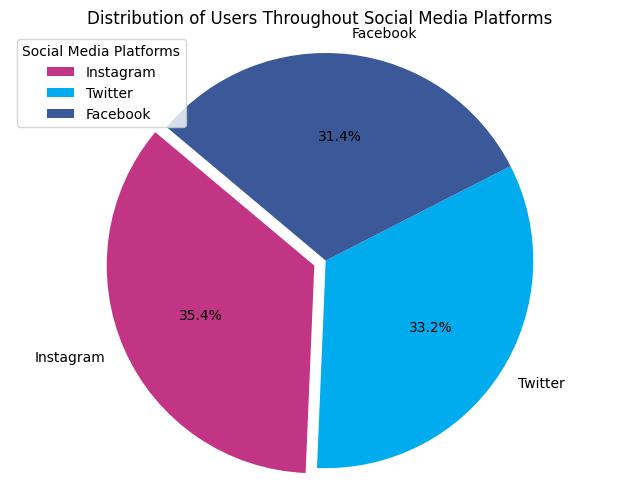

In [126]:
source_counts = df['Source'].value_counts().sort_values(ascending=False)

total_users = source_counts.sum()
colors = {'Facebook': '#3B5998', 'Twitter': '#00ACEE', 'Instagram': '#C13584'}
plt.figure(figsize=(8, 6))
plt.pie(source_counts, labels=source_counts.index, autopct="%1.1f%%", startangle=140,explode=[0.06, 0, 0], colors=[colors[platform] for platform in source_counts.index])

plt.title('Distribution of Users Throughout Social Media Platforms')
plt.legend(title='Social Media Platforms')

plt.axis('equal')
plt.show()

- From this graph, we can conclude that `Instagram` is the most used social media platform.
- Data can be divide our into 3 classes, each one represents a only one social media platform. 

### Dividing our Data into 3 Classes Based on the Social Media Platforms

#### Instagram

In [127]:
instagram_df = df[df['Source'] == 'Instagram']
instagram_df = instagram_df.reset_index(drop=True)
instagram_df.head()

Text Sentiment (Label)  \
0   Just finished an amazing workout! 💪          ...          Positive   
1   Trying out a new recipe for dinner tonight.  ...           Neutral   
2   The new movie release is a must-watch!       ...          Positive   
3   Just published a new blog post. Check it out!...          Positive   
4   New year, new fitness goals! 💪               ...          Positive   

         User     Source                   Topic  Retweets  Likes    Country  \
0  FitnessFan  Instagram       #Fitness #Workout        20     40        USA   
1    ChefCook  Instagram          #Cooking #Food        12     25  Australia   
2   MovieBuff  Instagram  #MovieNight #MustWatch        15     30        USA   
3    BloggerX  Instagram      #Blogging #NewPost        22     45        USA   
4  FitJourney  Instagram  #NewYear #FitnessGoals        28     55        USA   

   Year  Month  Day  Hour    hashtag1      hashtag2  
0  2023      1   15    15     Fitness       Workout  
1  2023      1   15    19     Cooking          Food  
2  2023      1   16    19  MovieNight     MustWatch  
3  2023      1   17    15    Blogging       NewPost  
4  2023      1   18    18     NewYear  FitnessGoals

#### Twitter

In [128]:
twitter_df = df[df['Source'] == 'Twitter']
twitter_df = twitter_df.reset_index(drop=True)
twitter_df.head()

Text Sentiment (Label)  \
0   Enjoying a beautiful day at the park!        ...          Positive   
1   Traffic was terrible this morning.           ...          Negative   
2   Feeling grateful for the little things in lif...          Positive   
3   Political discussions heating up on the timel...          Negative   
4   Feeling a bit under the weather today.       ...          Negative   

            User   Source                      Topic  Retweets  Likes Country  \
0        User123  Twitter              #Nature #Park        15     30     USA   
1      CommuterX  Twitter          #Traffic #Morning         5     10  Canada   
2   GratitudeNow  Twitter  #Gratitude #PositiveVibes        25     50   India   
3     DebateTalk  Twitter          #Politics #Debate        30     60     USA   
4  WellnessCheck  Twitter           #SickDay #Health         7     15  Canada   

   Year  Month  Day  Hour   hashtag1       hashtag2  
0  2023      1   15    12     Nature           Park  
1  2023      1   15     8    Traffic        Morning  
2  2023      1   16     9  Gratitude  PositiveVibes  
3  2023      1   17     8   Politics         Debate  
4  2023      1   18    10    SickDay         Health

#### Facebook

In [129]:
facebook_df = df[df['Source'] == 'Facebook']
facebook_df = facebook_df.reset_index(drop=True)
facebook_df.head()

Text Sentiment (Label)  \
0   Excited about the upcoming weekend getaway!  ...          Positive   
1   Rainy days call for cozy blankets and hot coc...          Positive   
2   Missing summer vibes and beach days.         ...           Neutral   
3   Exploring the city's hidden gems.            ...          Positive   
4   Reflecting on the past and looking ahead.    ...          Positive   

            User    Source                     Topic  Retweets  Likes  \
0     AdventureX  Facebook        #Travel #Adventure         8     15   
1      RainyDays  Facebook          #RainyDays #Cozy        10     20   
2     BeachLover  Facebook        #Summer #BeachDays        18     35   
3  UrbanExplorer  Facebook  #CityExplore #HiddenGems        12     25   
4    Reflections  Facebook       #Reflection #Future        20     40   

     Country  Year  Month  Day  Hour     hashtag1    hashtag2  
0         UK  2023      1   15    18       Travel   Adventure  
1     Canada  2023      1   16    14    RainyDays        Cozy  
2  Australia  2023      1   17    12       Summer   BeachDays  
3         UK  2023      1   18    14  CityExplore  HiddenGems  
4        USA  2023      1   19    13   Reflection      Future

### Which countries have the most users for each social media platform?

#### Instagram:

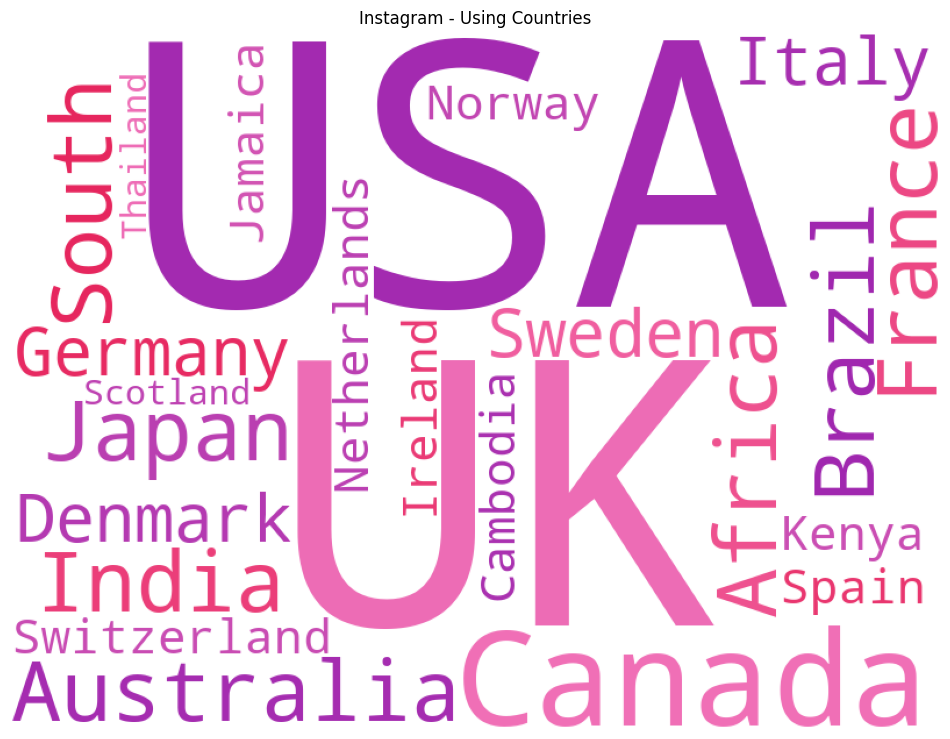

In [130]:
instagram_colors = ["#E41A4F", "#F472B6", "#9B23AF"]
custom_colormap = LinearSegmentedColormap.from_list("custom", instagram_colors)
country_counts = instagram_df['Country'].value_counts()

wordcloud = WordCloud(background_color='white', colormap=custom_colormap,width=800, height=600).generate(' '.join(country_counts.index))

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Instagram - Using Countries")
plt.show()

For Instagram The most users come from: USA, UK and Canada.


#### Twitter:

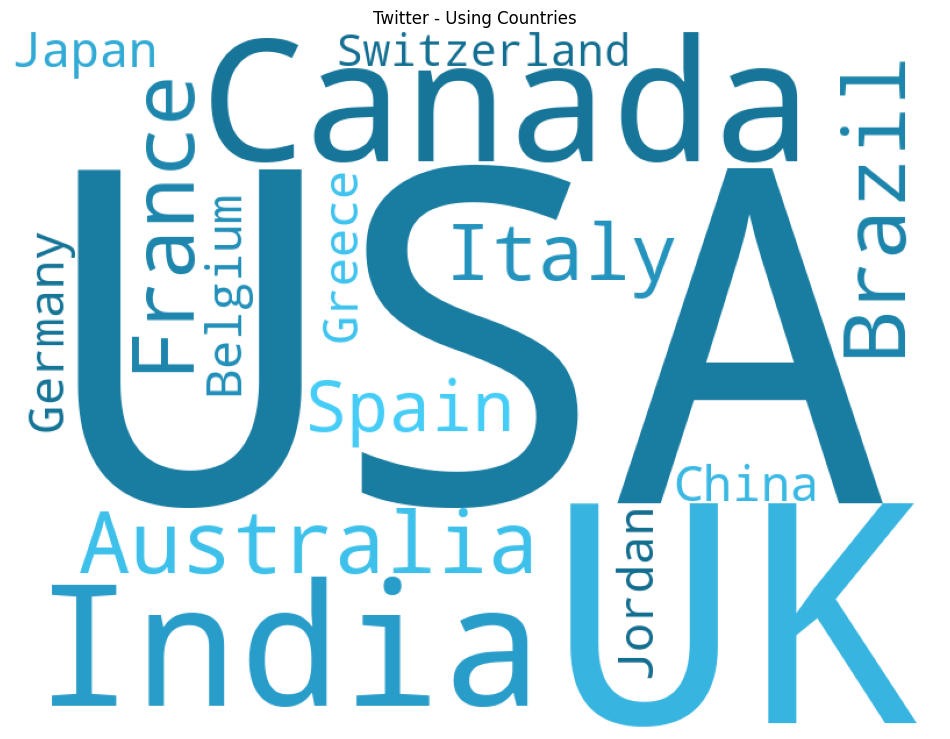

In [131]:
twitter_colors = ['#49D3FD','#299DC9','#0E6483']

custom_colormap = LinearSegmentedColormap.from_list("custom", twitter_colors)
country_counts = twitter_df['Country'].value_counts()

wordcloud = WordCloud(background_color='white',
                      colormap=custom_colormap,width=800, height=600).generate(' '.join(country_counts.index))

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Twitter - Using Countries")
plt.show()

For Twitter most usrs are from: USA, UK and Canada.


#### Facebook:

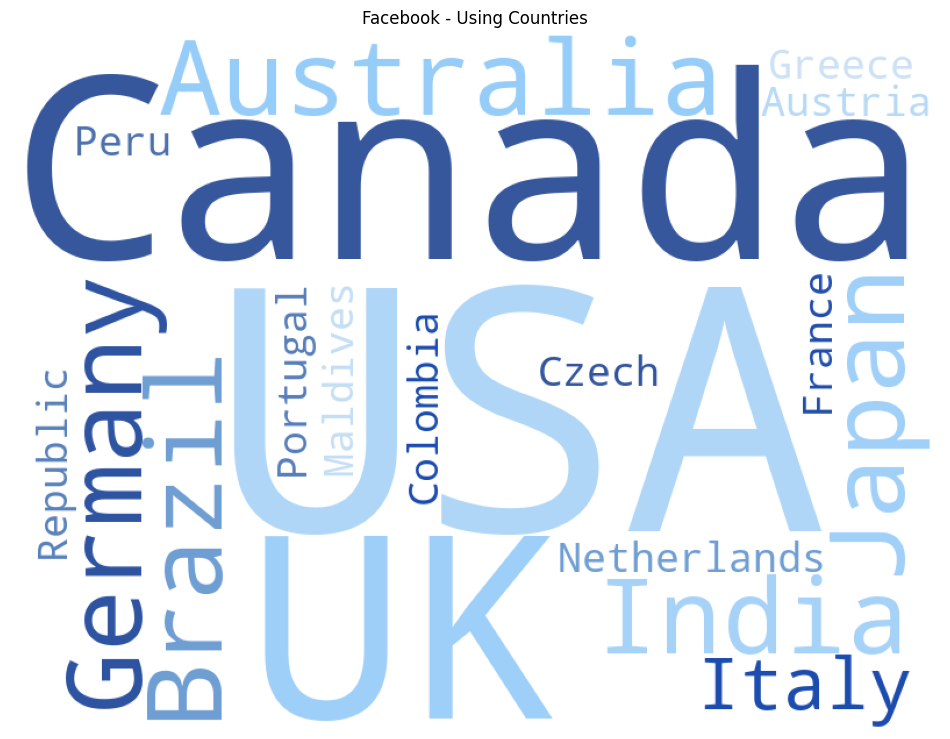

In [132]:
facebook_colors = ["#D2E3F3", "#90CAF9", "#3B5998", "#1A4BAF"]
custom_colormap = LinearSegmentedColormap.from_list("custom", facebook_colors)
country_counts = facebook_df['Country'].value_counts()

wordcloud = WordCloud(background_color='white',
                       colormap=custom_colormap,width=800, height=600).generate(' '.join(country_counts.index))

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Facebook - Using Countries")
plt.show()

The same combinations applies from Facebook but it has it's own share from Australian and Indian users.

### What is The Most Dominant Sentiment at each hour per day?

In [133]:
## Customized Color Palette
color_list = [
    "#ff0000",  # Vivid Red
    "#007bff",  # Electric Blue
    "#38b000",  # Vivid Green
    "#ffc107",  # Sun Yellow
    "#e6194b",  # Deep Pink
    
    "#d0e0e3",  # Lavender Blue
    "#98df8a",  # Light Mint Green
    "#fce4d6",  # Soft Peach
    "#add8e6",  # Pale Sky Blue
    "#ffffd9",  # Light Yellow
    
    "#000000",  # Black
    "#333333",  # Dark Gray
    "#808080",  # Medium Gray
    "#cccccc",  # Light Gray
    "#ffffff",  # White
    
    "#001f3f",  # Deep Ocean Blue (Colorfulness)
    "#00d277",  # Vibrant Teal (Colorfulness)
    "#f7931a",  # Sunset Orange (Colorfulness)
    "#d000b6",  # Light Purple (Colorfulness)
    "#43a047",  # Forest Green (Colorfulness)
    
    "#e97451",  # Burnt Sienna (Earth Tones)
    "#38a3a5",  # Olive Green (Earth Tones)
    "#53392e",  # Dark Brown (Earth Tones)
    "#f5f5dc",  # Sandy Beige (Earth Tones)
    "#c62828"   # Clay Red (Earth Tones)
]

#### Instagram

<Axes: title={'center': 'Instagram Sentiment Proportions Across The Day'}, xlabel='Hour'>

<Figure size 1200x800 with 0 Axes>

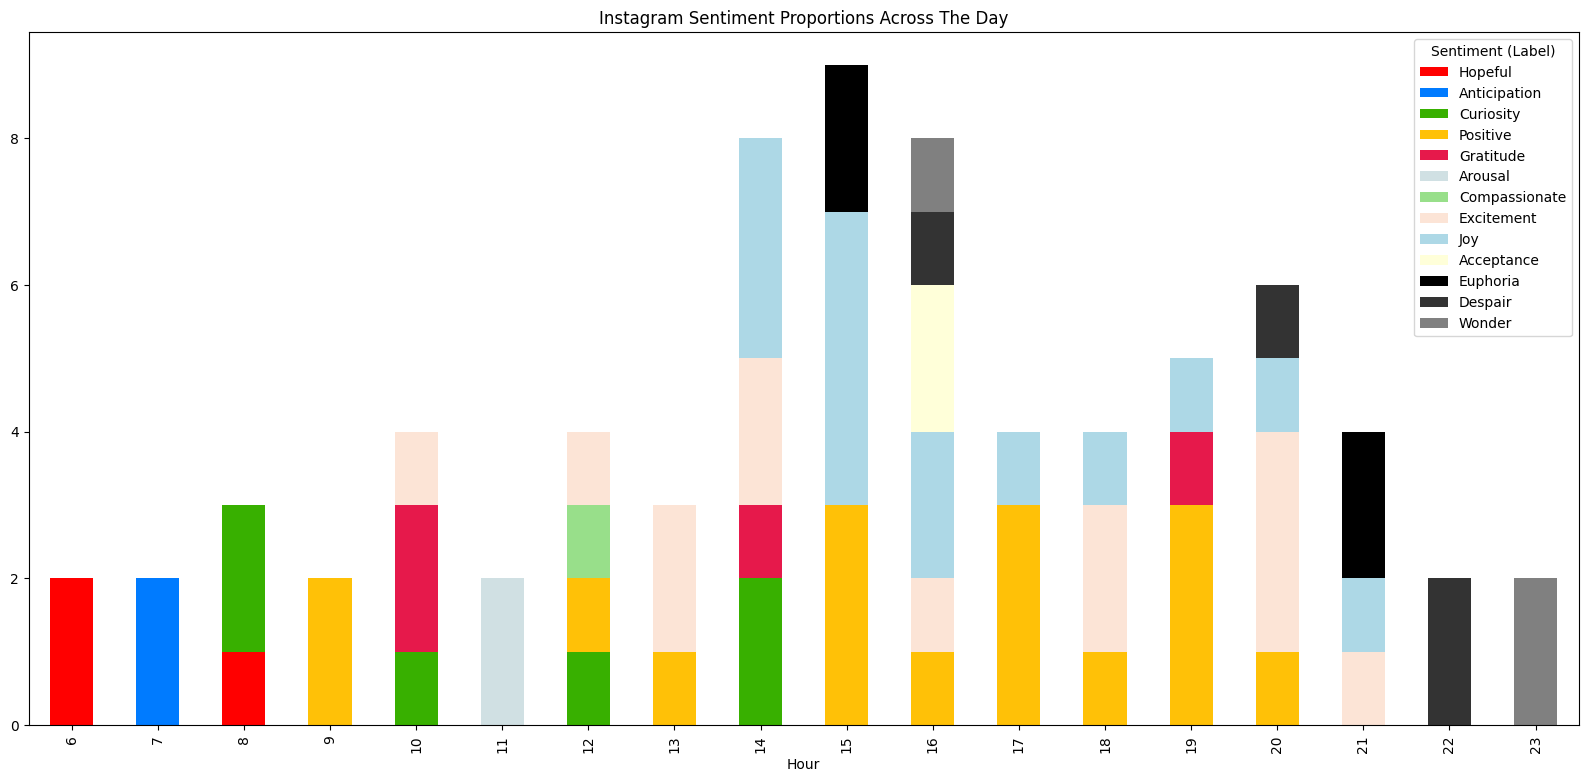

In [134]:
instagram_df['Hour'] = pd.to_numeric(instagram_df['Hour'], errors='coerce')

instagram_sentiment_hours = (
    instagram_df.groupby(['Hour'])['Sentiment (Label)']
    .value_counts()
    .unstack(fill_value=0)
)
plt.figure(figsize=(12, 8))
instagram_dominant_sentiment = instagram_sentiment_hours.idxmax(axis=1)

instagram_filtered_counts = instagram_sentiment_hours[instagram_dominant_sentiment.unique()]

instagram_filtered_counts.plot.bar(
    figsize = (20,9),
    stacked=True,
    color=color_list,
    title ="Instagram Sentiment Proportions Across The Day"
)

#### Twitter

<Axes: title={'center': 'Twitter Sentiment Proportions Across The Day'}, xlabel='Hour'>

<Figure size 1200x800 with 0 Axes>

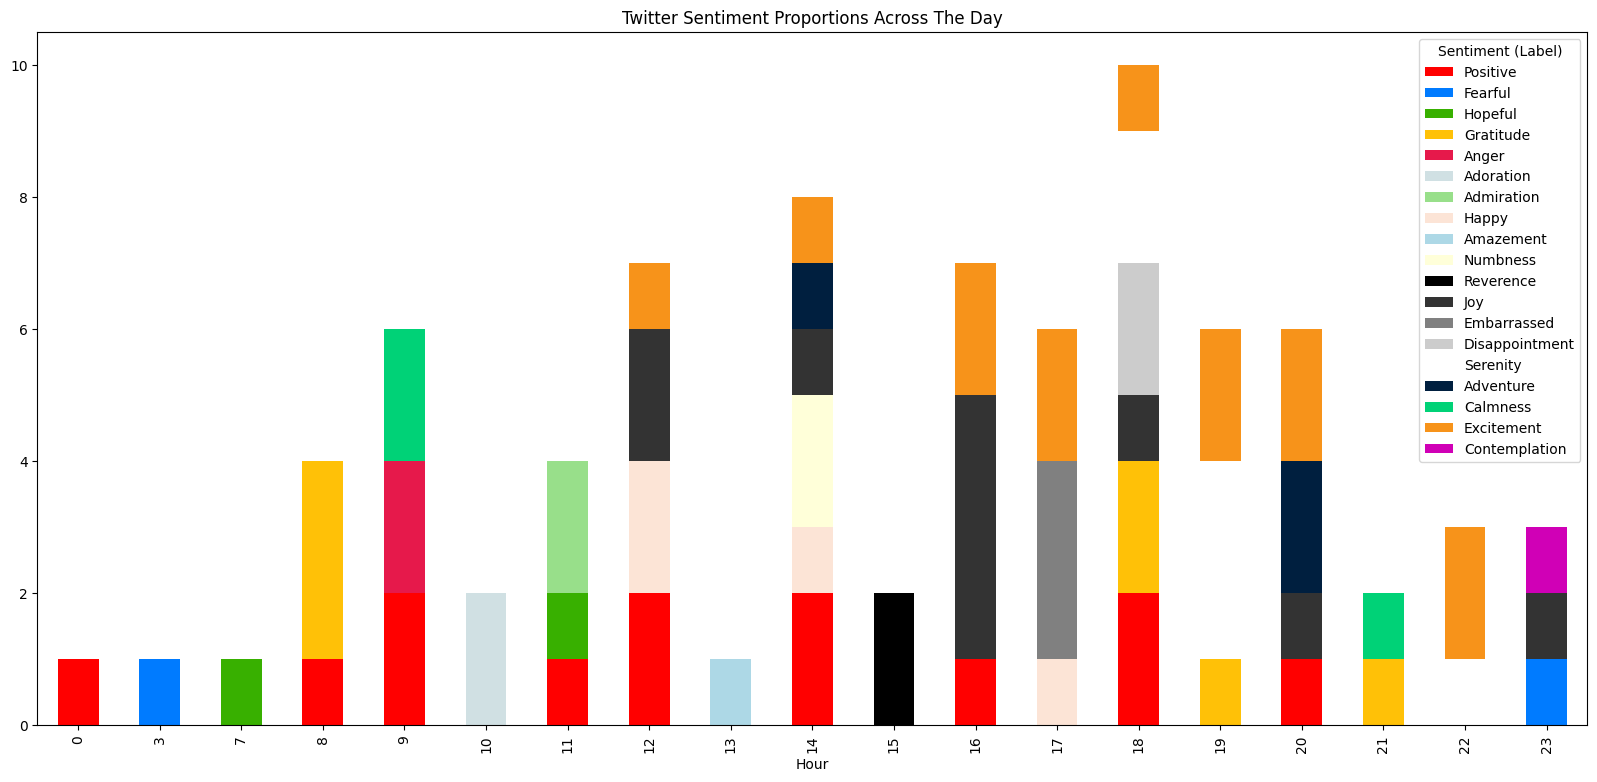

In [135]:
twitter_df['Hour'] = pd.to_numeric(twitter_df['Hour'], errors='coerce')

twitter_sentiment_hours = (
    twitter_df.groupby(['Hour'])['Sentiment (Label)']
    .value_counts()
    .unstack(fill_value=0)
)
plt.figure(figsize=(12, 8))
twitter_dominant_sentiment = twitter_sentiment_hours.idxmax(axis=1)

twitter_filtered_counts = twitter_sentiment_hours[twitter_dominant_sentiment.unique()]

twitter_filtered_counts.plot.bar(
    figsize = (20,9),
    stacked=True,
    color=color_list,
    title ="Twitter Sentiment Proportions Across The Day"
)

#### Facebook

<Axes: title={'center': 'Instagram Sentiment Proportions Across The Day'}, xlabel='Hour'>

<Figure size 1200x800 with 0 Axes>

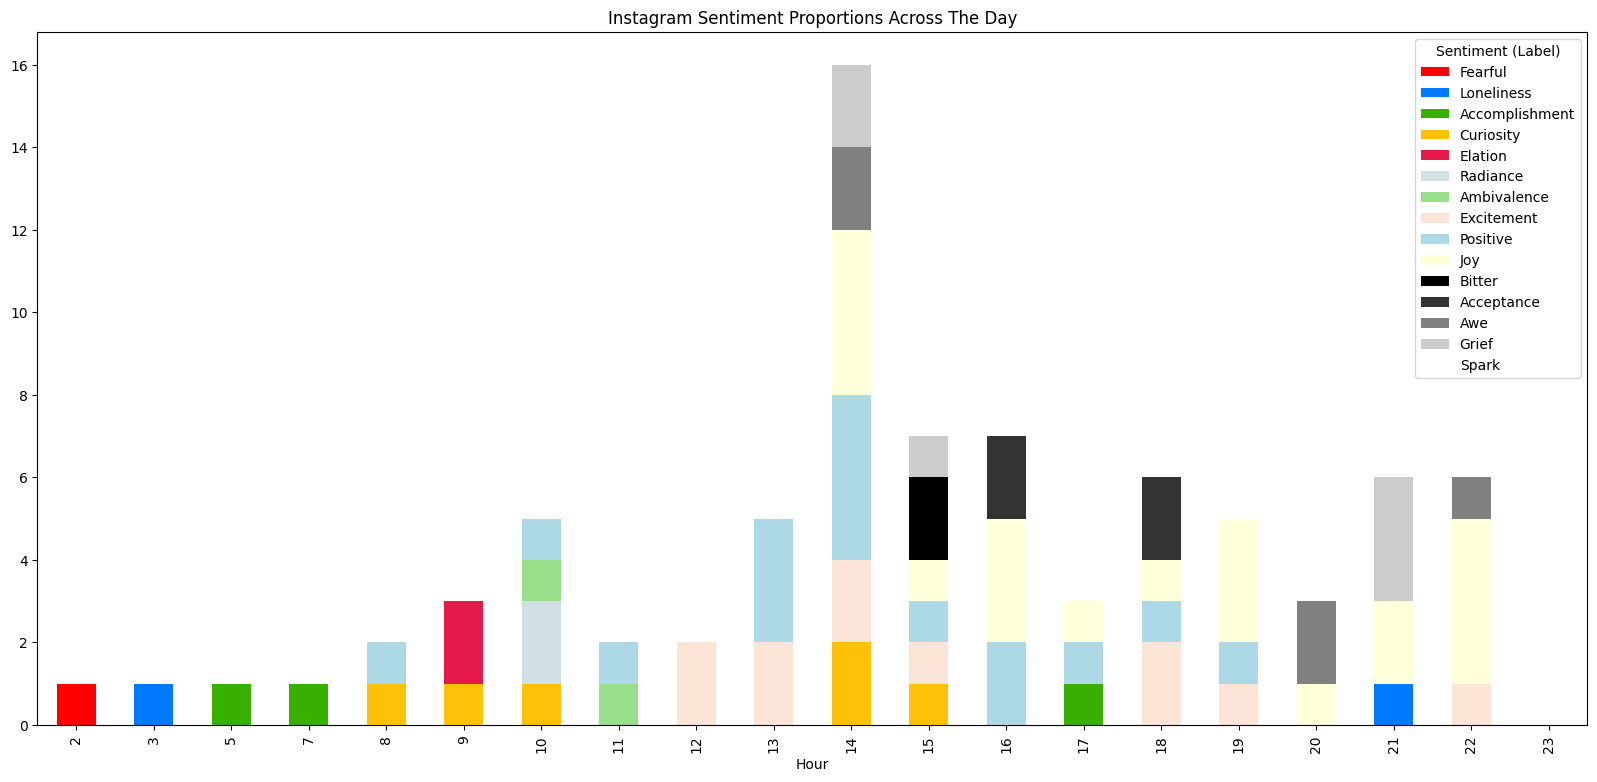

In [136]:
facebook_df['Hour'] = pd.to_numeric(facebook_df['Hour'], errors='coerce')

facebook_sentiment_hours = (
    facebook_df.groupby(['Hour'])['Sentiment (Label)']
    .value_counts()
    .unstack(fill_value=0)
)
plt.figure(figsize=(12, 8))
facebook_dominant_sentiment = facebook_sentiment_hours.idxmax(axis=1)

facebook_filtered_counts = facebook_sentiment_hours[facebook_dominant_sentiment.unique()]

facebook_filtered_counts.plot.bar(
    figsize = (20,9),
    stacked=True,
    color=color_list,
    title ="Instagram Sentiment Proportions Across The Day"
)

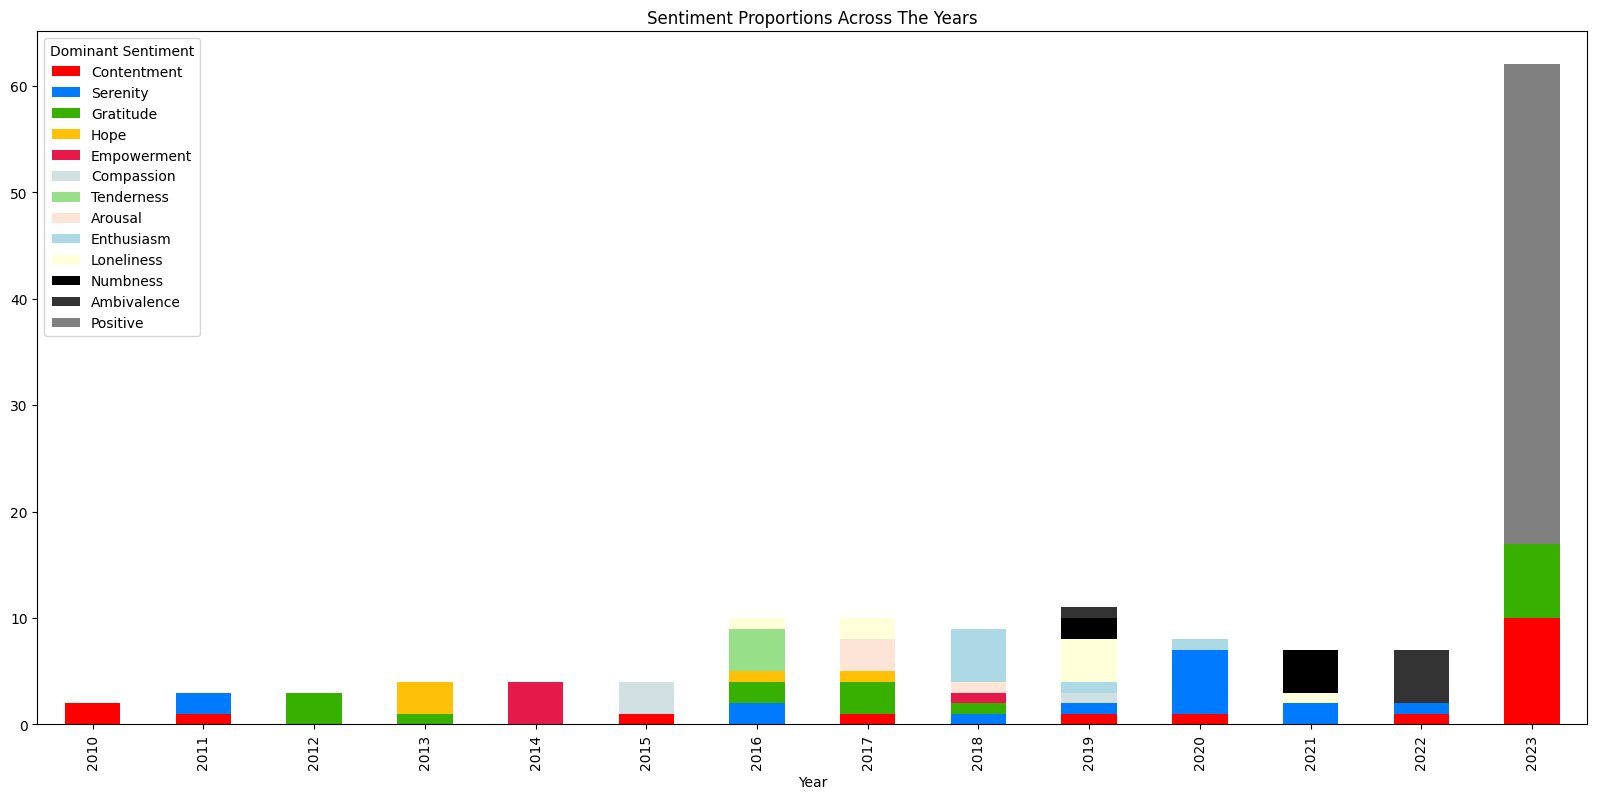

In [137]:

sentiment_by_year = df.groupby('Year')['Sentiment (Label)'].value_counts().unstack(fill_value=0)

dominant_sentiment = sentiment_by_year.idxmax(axis=1)

filtered_counts = sentiment_by_year[dominant_sentiment.unique()]

filtered_counts.plot.bar(
                        figsize=(20, 9),
                        stacked=True,
                        color=color_list,
                        title = "Sentiment Proportions Across The Years")

plt.legend(title="Dominant Sentiment", labels=filtered_counts.columns)

### What are The Most Frequent Hashtags?

#### Instagram

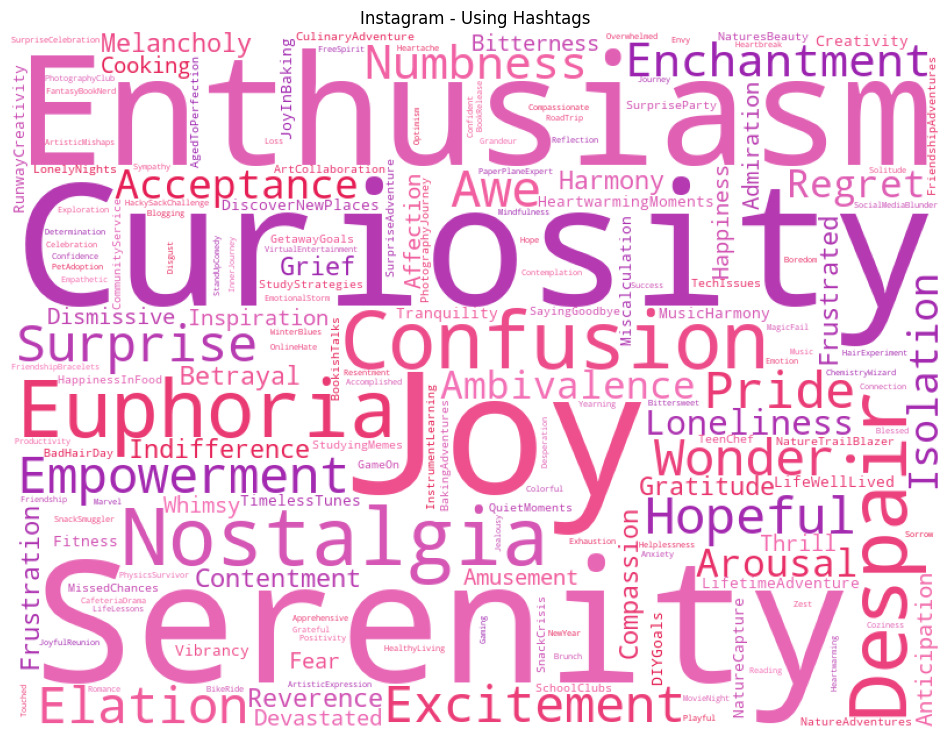

In [138]:
custom_colormap = LinearSegmentedColormap.from_list("custom", instagram_colors)
hashtags_counts = instagram_df['hashtag1'].value_counts()

wordcloud = WordCloud(background_color='white',
                      colormap=custom_colormap,width=800, height=600).generate(' '.join(hashtags_counts.index))

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Instagram - Using Hashtags")
plt.show()

#### Twitter

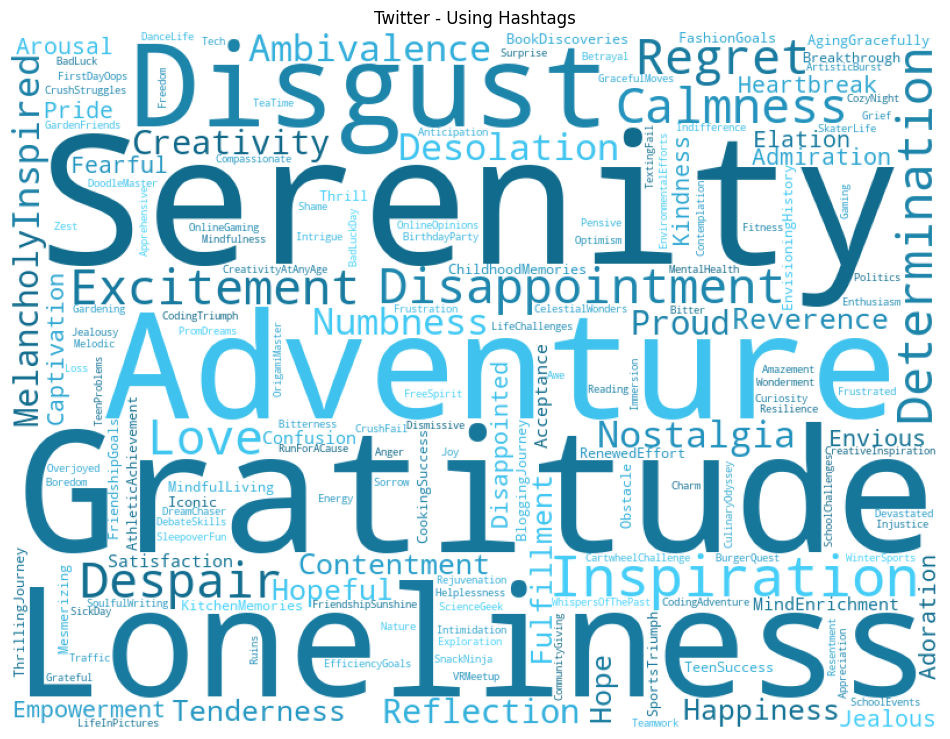

In [139]:
custom_colormap = LinearSegmentedColormap.from_list("custom", twitter_colors)
hashtag_counts = twitter_df['hashtag1'].value_counts()

wordcloud = WordCloud(background_color='white',
                      colormap=custom_colormap,width=800, height=600).generate(' '.join(hashtag_counts.index))

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Twitter - Using Hashtags")
plt.show()

#### Facebook

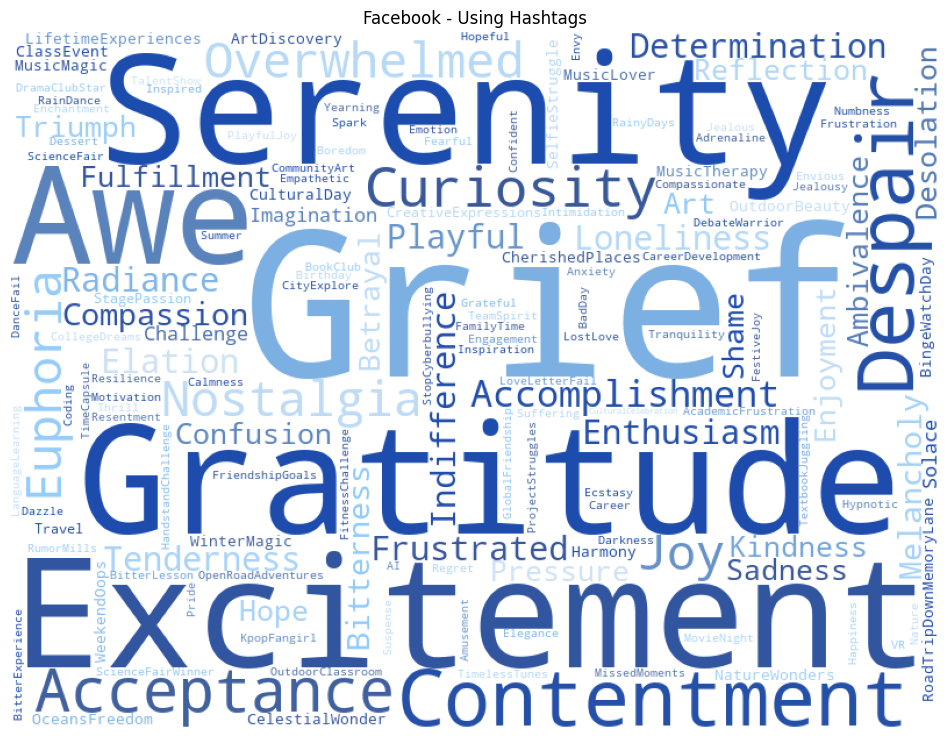

In [140]:
custom_colormap = LinearSegmentedColormap.from_list("custom", facebook_colors)
hashtag_counts = facebook_df['hashtag1'].value_counts()

wordcloud = WordCloud(background_color='white',  
                      colormap=custom_colormap,width=800, height=600).generate(' '.join(hashtag_counts.index))

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Facebook - Using Hashtags")
plt.show()

------

### Distribution of Likes Across Sentiment Labels (Top 3)

#### Instagram

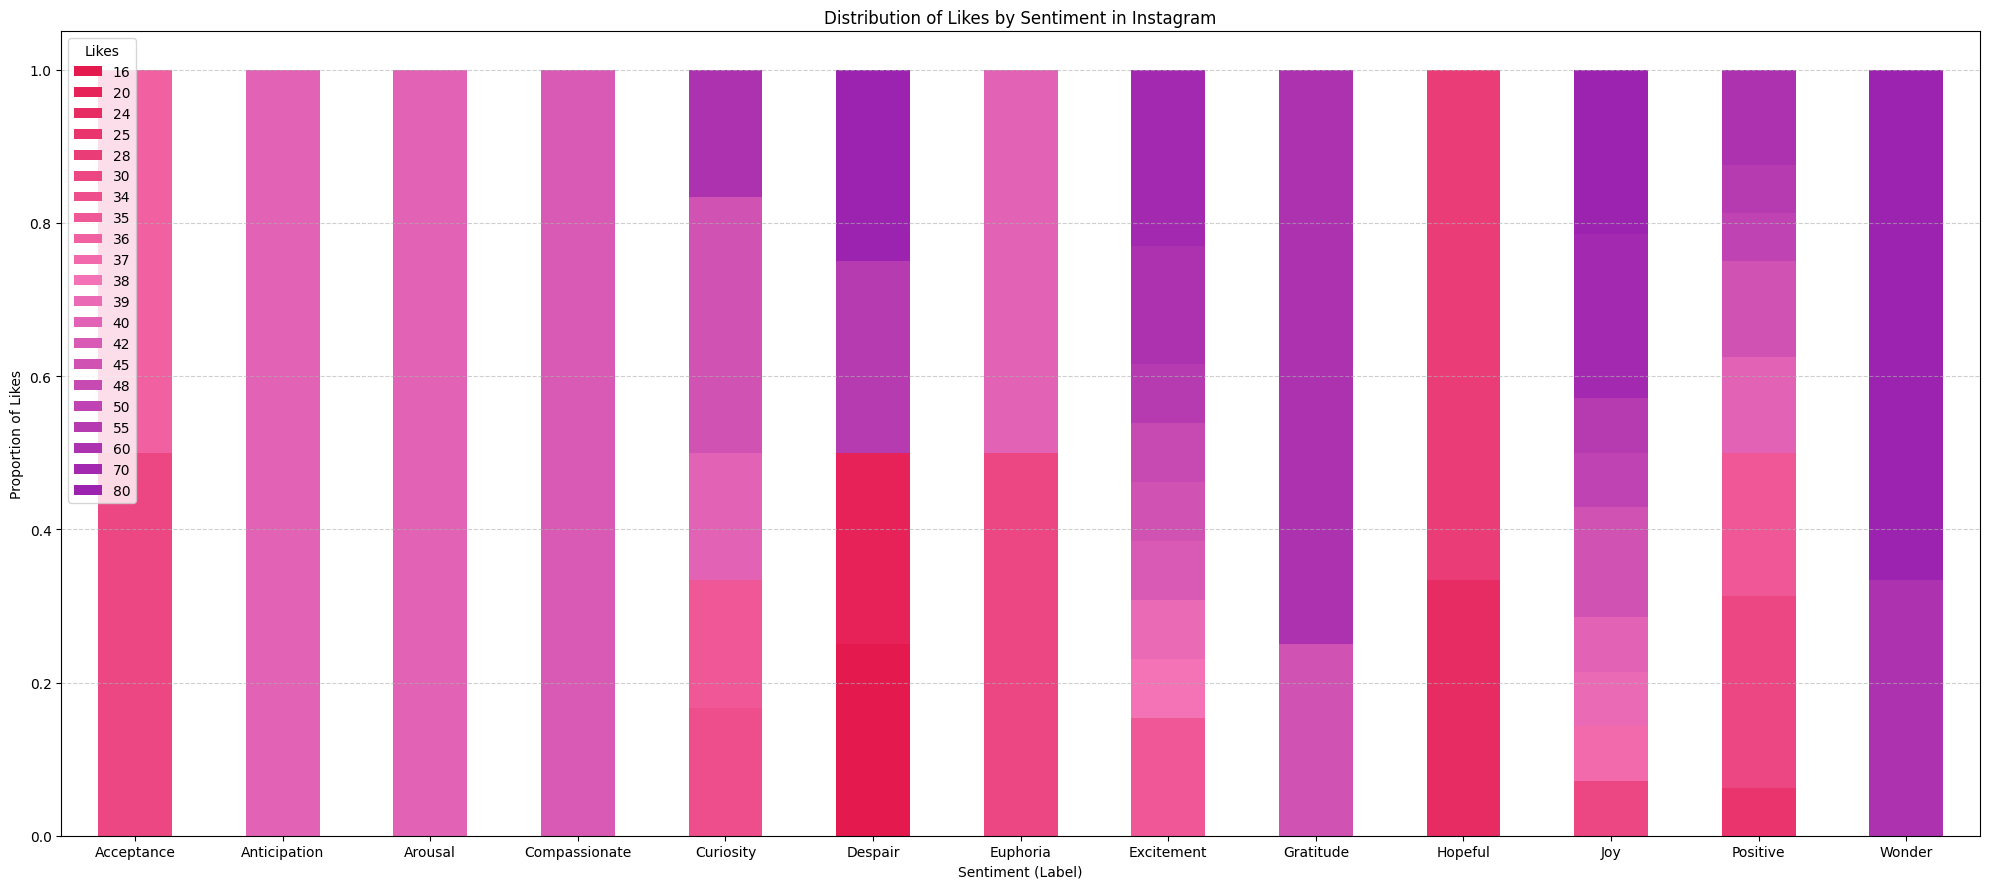

In [141]:
likes_sentiments = pd.crosstab(
    instagram_df[instagram_df["Sentiment (Label)"].isin(instagram_dominant_sentiment)]["Sentiment (Label)"],
    instagram_df["Likes"],
    normalize=0,
)
likes_sentiments.plot.bar(
    stacked=True,
    figsize=(20, 9),
    colormap=LinearSegmentedColormap.from_list("", instagram_colors),
    title="Distribution of Likes by Sentiment in Instagram"
)

plt.xlabel("Sentiment (Label)")
plt.ylabel("Proportion of Likes")
plt.xticks(rotation=0)
plt.legend(title="Likes", loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

#### Twitter

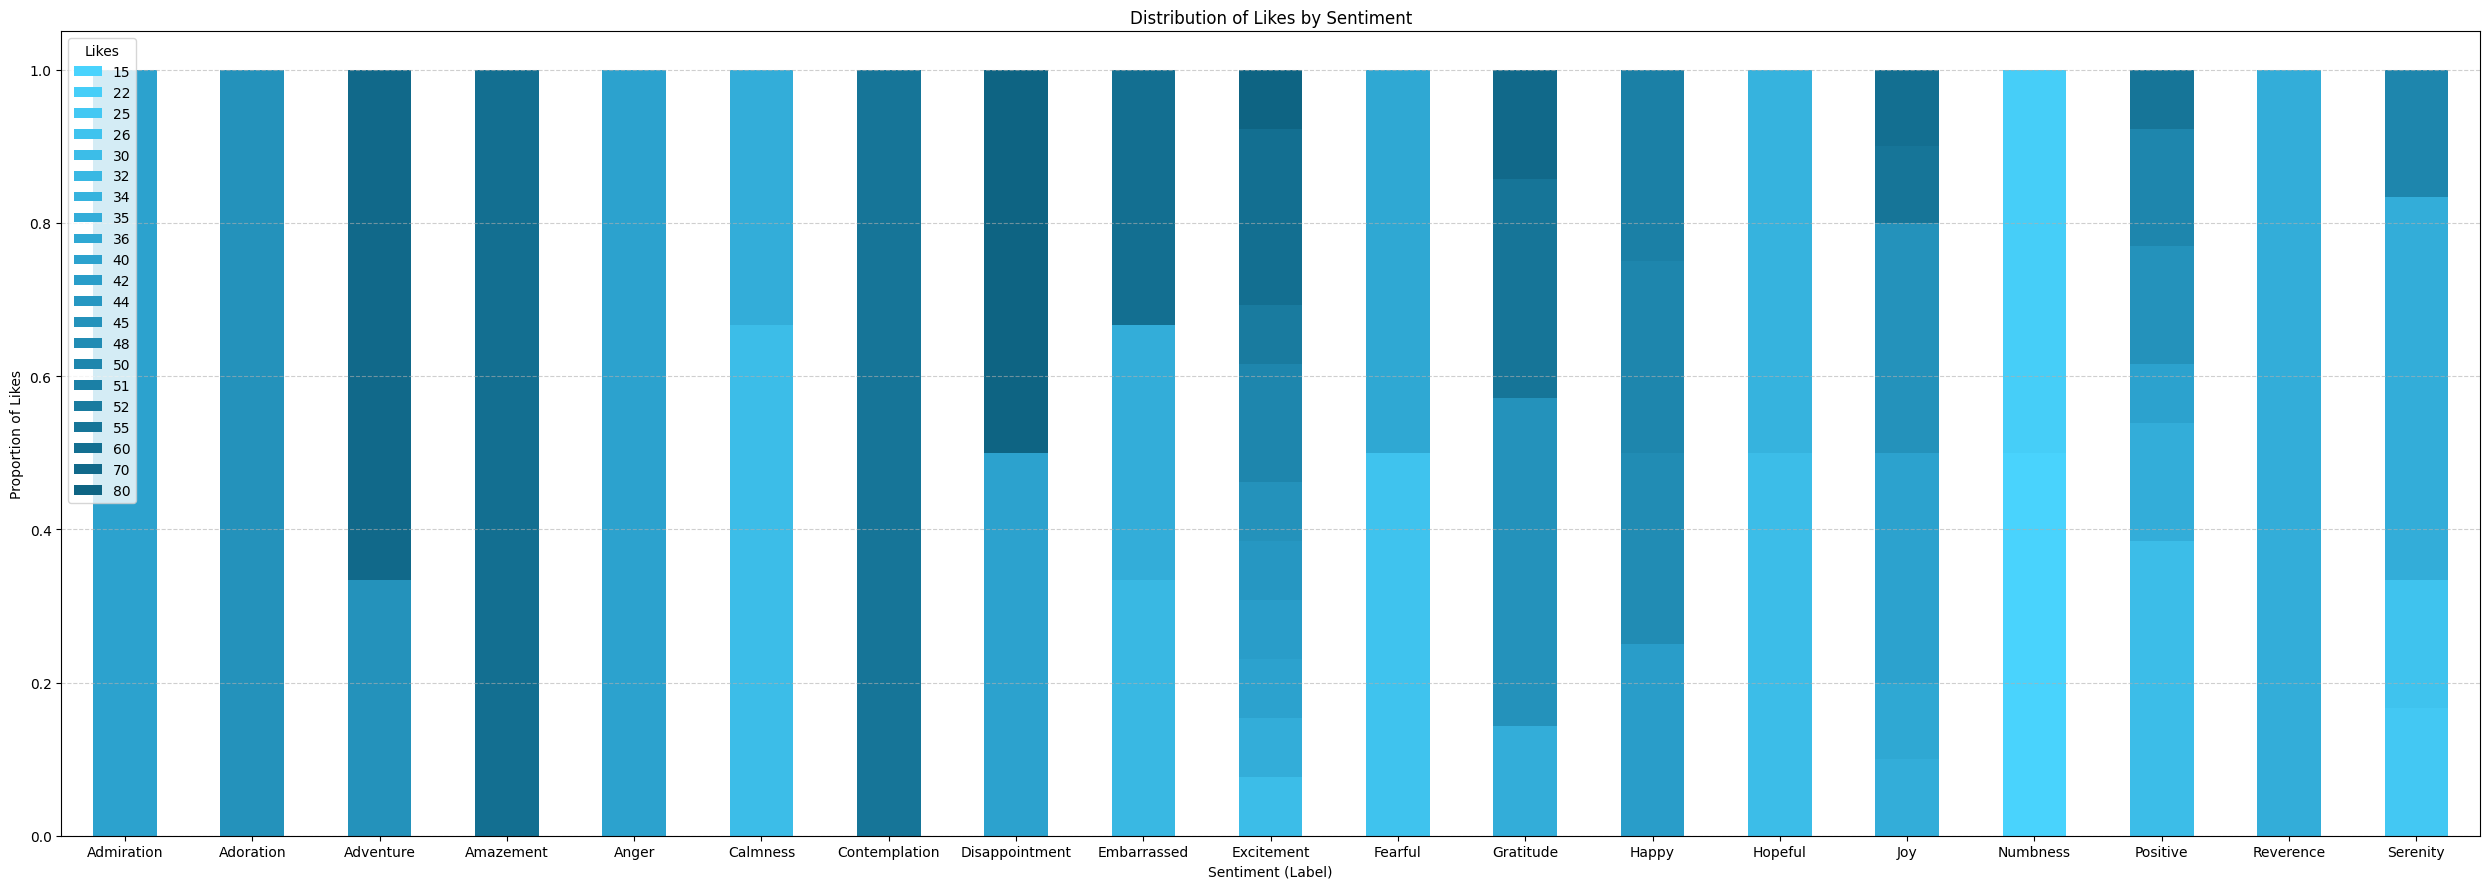

In [142]:
likes_sentiments = pd.crosstab(
    twitter_df[twitter_df["Sentiment (Label)"].isin(twitter_dominant_sentiment)]["Sentiment (Label)"],
    twitter_df["Likes"],
    normalize=0,
)
likes_sentiments.plot.bar(
    stacked=True,
    figsize=(25, 9),
    colormap=LinearSegmentedColormap.from_list("", twitter_colors),
    title="Distribution of Likes by Sentiment"
)

plt.xlabel("Sentiment (Label)")
plt.ylabel("Proportion of Likes")
plt.xticks(rotation=0)
plt.legend(title="Likes", loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

#### Facebook

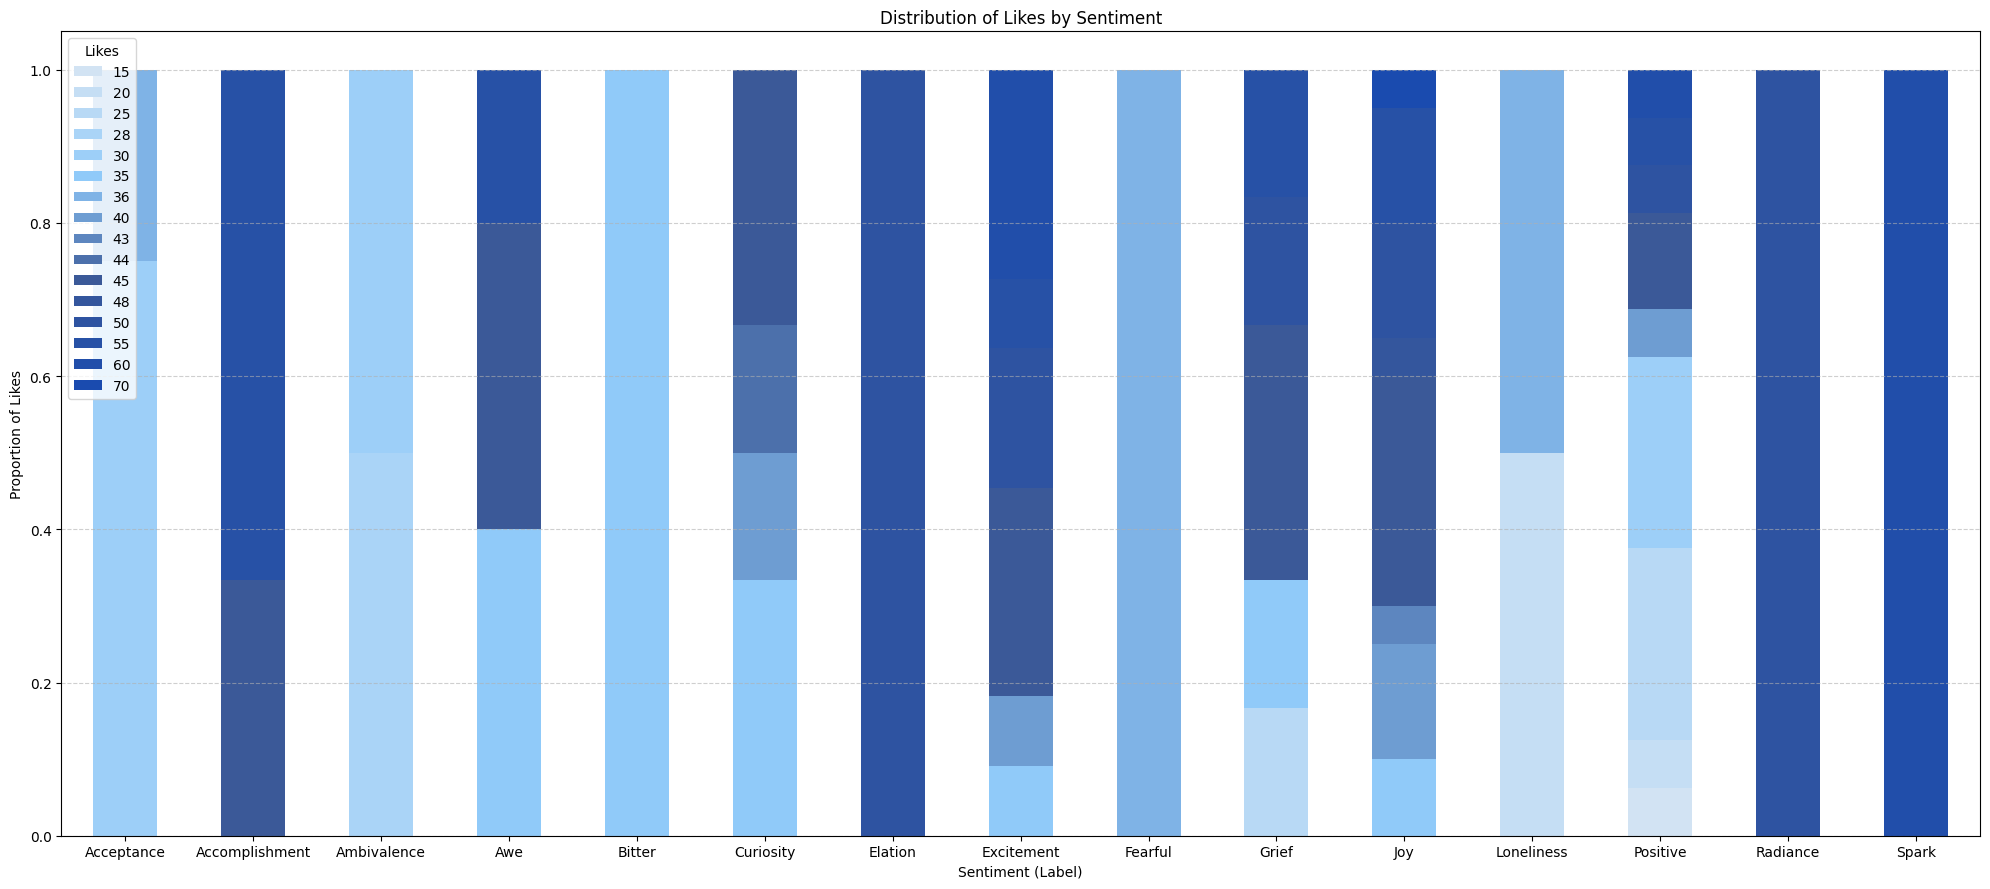

In [143]:
likes_sentiments = pd.crosstab(
    facebook_df[facebook_df["Sentiment (Label)"].isin(facebook_dominant_sentiment)]["Sentiment (Label)"],
    facebook_df["Likes"],
    normalize=0,
)
likes_sentiments.plot.bar(
    stacked=True,
    figsize=(20, 9),
    colormap=LinearSegmentedColormap.from_list("", facebook_colors),
    title="Distribution of Likes by Sentiment"
)

plt.xlabel("Sentiment (Label)")
plt.ylabel("Proportion of Likes")
plt.xticks(rotation=0)
plt.legend(title="Likes", loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### What are The Most Dominant Sentiment?

#### Instagram

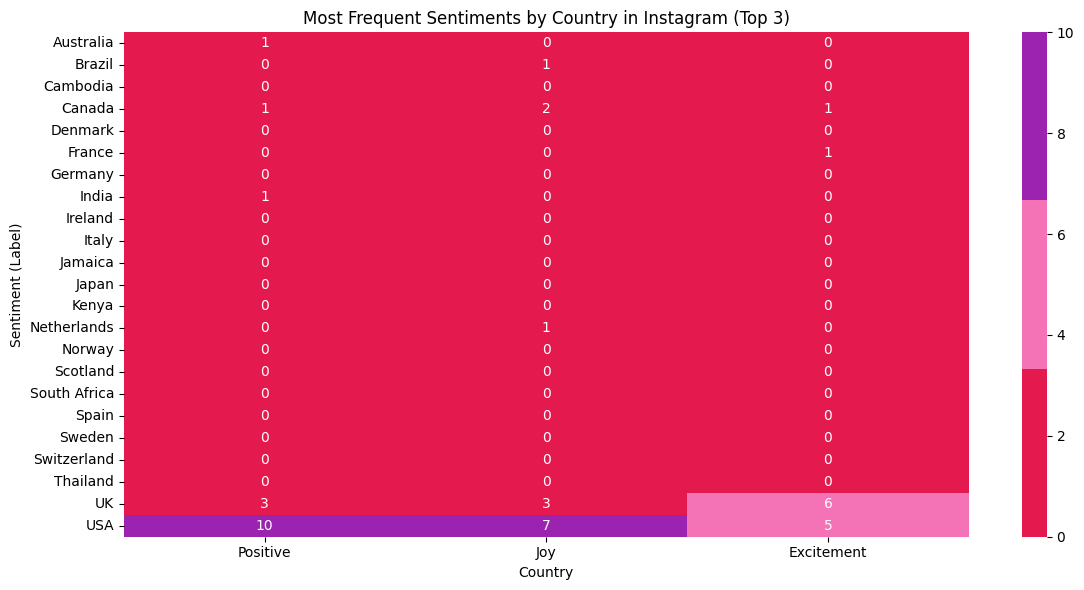

In [144]:
sentiment_counts = (
   instagram_df.groupby(['Country', 'Sentiment (Label)'])['Sentiment (Label)']
    .count()
    .unstack(fill_value=0)
)

plt.figure(figsize=(12, 6))
top_sentiments = sentiment_counts.sum(axis=0).sort_values(ascending=False).head(3).index

filtered_counts = sentiment_counts[top_sentiments]

sns.heatmap(filtered_counts, annot=True, cmap = instagram_colors)
plt.xlabel("Country")
plt.ylabel("Sentiment (Label)")
plt.title("Most Frequent Sentiments by Country in Instagram (Top 3)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Twitter

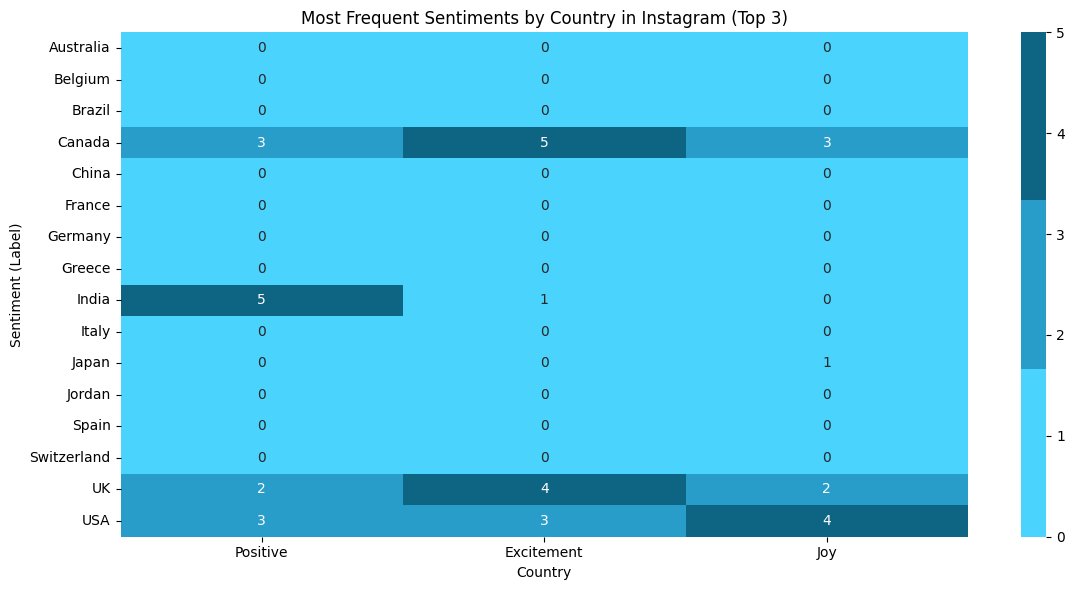

In [146]:
sentiment_counts = (
   twitter_df.groupby(['Country', 'Sentiment (Label)'])['Sentiment (Label)']
    .count()
    .unstack(fill_value=0)
)
plt.figure(figsize=(12, 6))

top_sentiments = sentiment_counts.sum(axis=0).sort_values(ascending=False).head(3).index

filtered_counts = sentiment_counts[top_sentiments]

sns.heatmap(filtered_counts, annot=True, cmap = twitter_colors)  # Adjust colormap as desired
plt.xlabel("Country")
plt.ylabel("Sentiment (Label)")
plt.title("Most Frequent Sentiments by Country in Instagram (Top 3)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Facebook

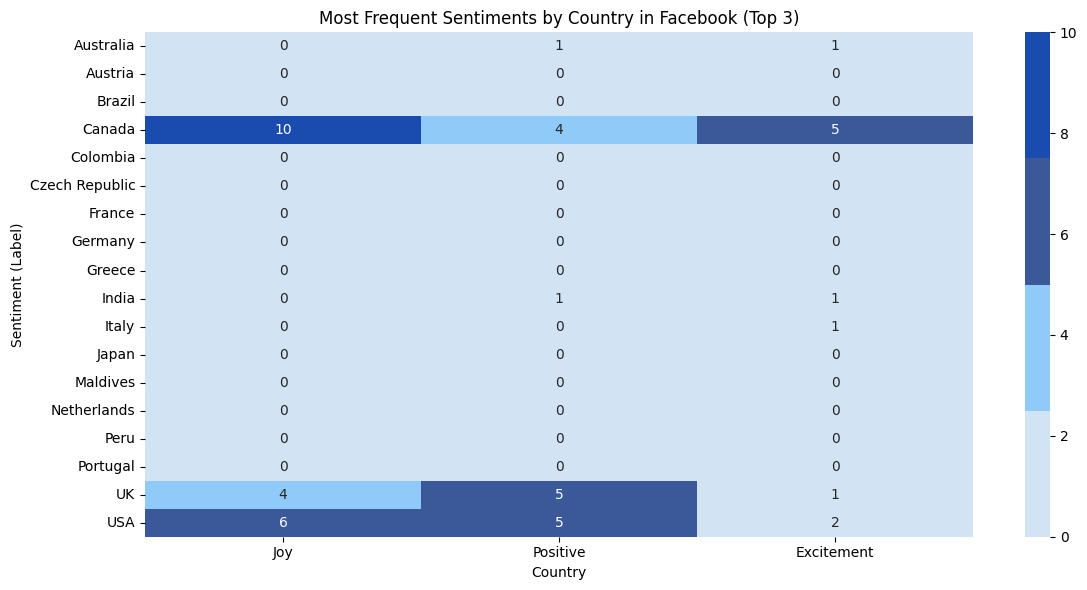

In [148]:
sentiment_counts = (
   facebook_df.groupby(['Country', 'Sentiment (Label)'])['Sentiment (Label)']
    .count()
    .unstack(fill_value=0)
)

plt.figure(figsize=(12, 6))
top_sentiments = sentiment_counts.sum(axis=0).sort_values(ascending=False).head(3).index

filtered_counts = sentiment_counts[top_sentiments]

sns.heatmap(filtered_counts, annot=True, cmap = facebook_colors)
plt.xlabel("Country")
plt.ylabel("Sentiment (Label)")
plt.title("Most Frequent Sentiments by Country in Facebook (Top 3)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### What Hour has The Most Likes Interactions?

#### Instagram

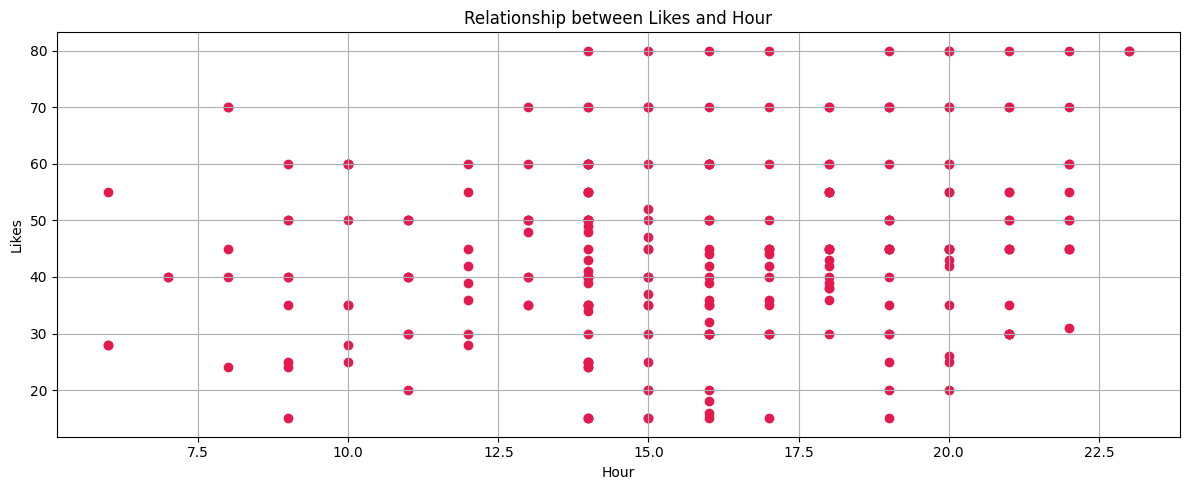

In [149]:
plt.figure(figsize=(12, 5))
plt.scatter(y=instagram_df['Likes'], x=instagram_df['Hour'], c=instagram_colors[0])

plt.xlabel('Hour')
plt.ylabel('Likes')
plt.title('Relationship between Likes and Hour')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Twitter

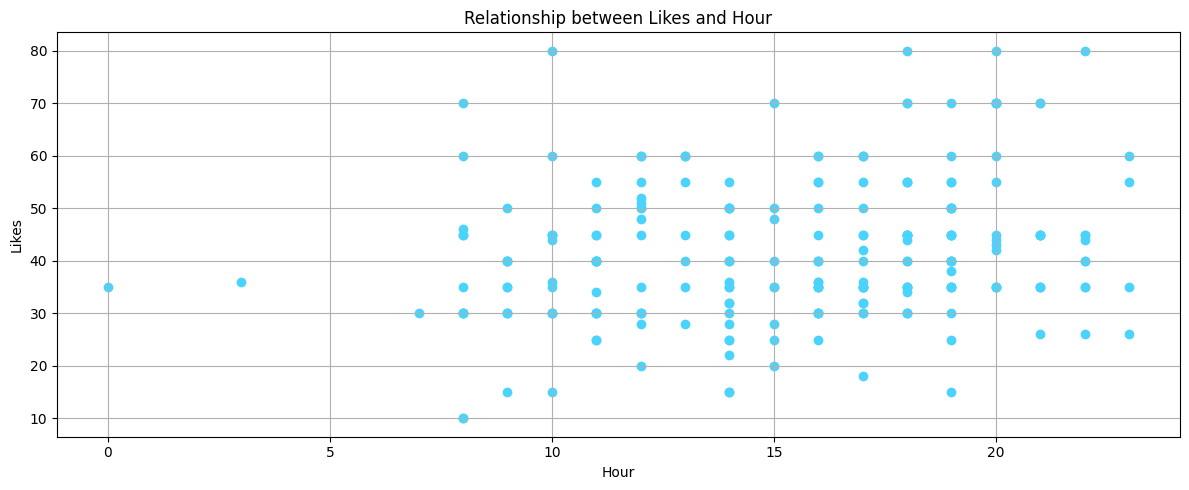

In [150]:
plt.figure(figsize=(12, 5))
plt.scatter(y=twitter_df['Likes'], x=twitter_df['Hour'], c=twitter_colors[0])
plt.xlabel('Hour')
plt.ylabel('Likes')
plt.title('Relationship between Likes and Hour')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Facebook

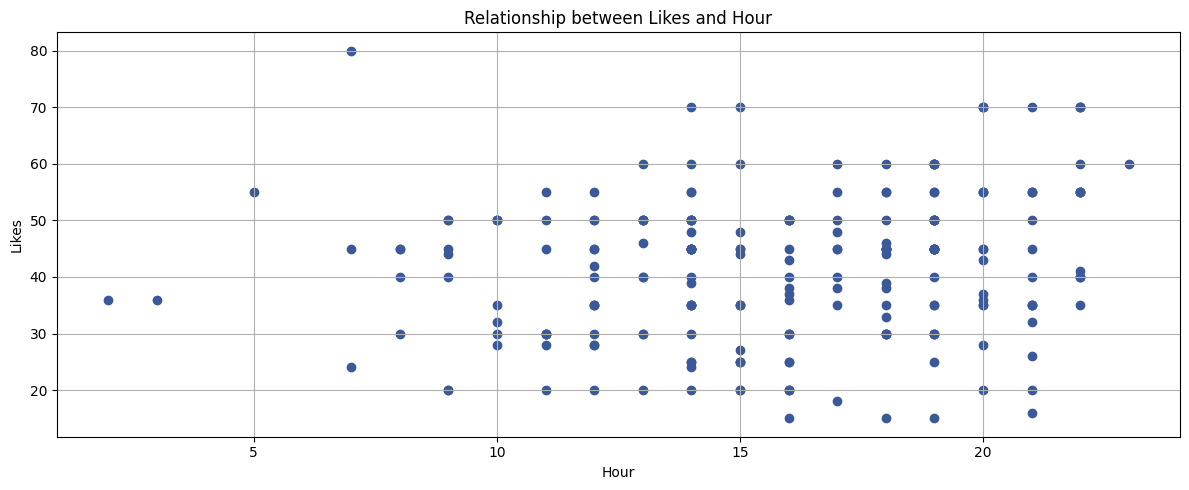

In [151]:
plt.figure(figsize=(12, 5))
plt.scatter(y=facebook_df['Likes'], x=facebook_df['Hour'], c=facebook_colors[2])

plt.xlabel('Hour')
plt.ylabel('Likes')
plt.title('Relationship between Likes and Hour')
plt.grid(True)
plt.tight_layout()
plt.show()

### What are The Most Liked Topics?

#### Instagram

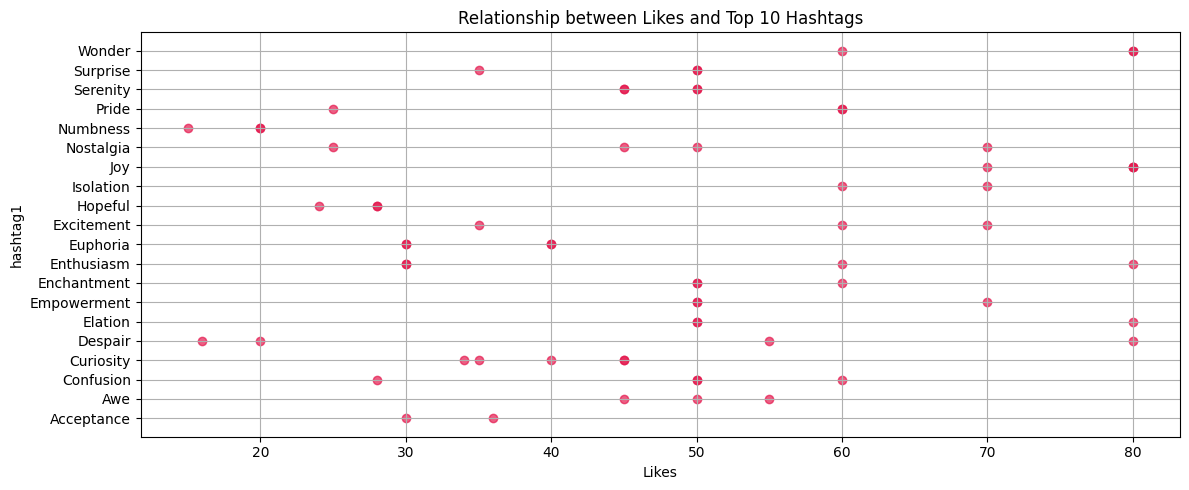

In [152]:
hashtag_counts = instagram_df['hashtag1'].value_counts().head(20) + instagram_df['hashtag2'].value_counts().head(20) 

plt.figure(figsize=(12, 5))
for hashtag, count in hashtag_counts.items():
    filtered_df = instagram_df[instagram_df['hashtag1'] == hashtag]
    plt.scatter(filtered_df['Likes'], [hashtag] * len(filtered_df)
                , c=instagram_colors[0], alpha=0.7)

plt.xlabel('Likes')
plt.ylabel('hashtag1')
plt.title('Relationship between Likes and Top 10 Hashtags')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Twitter

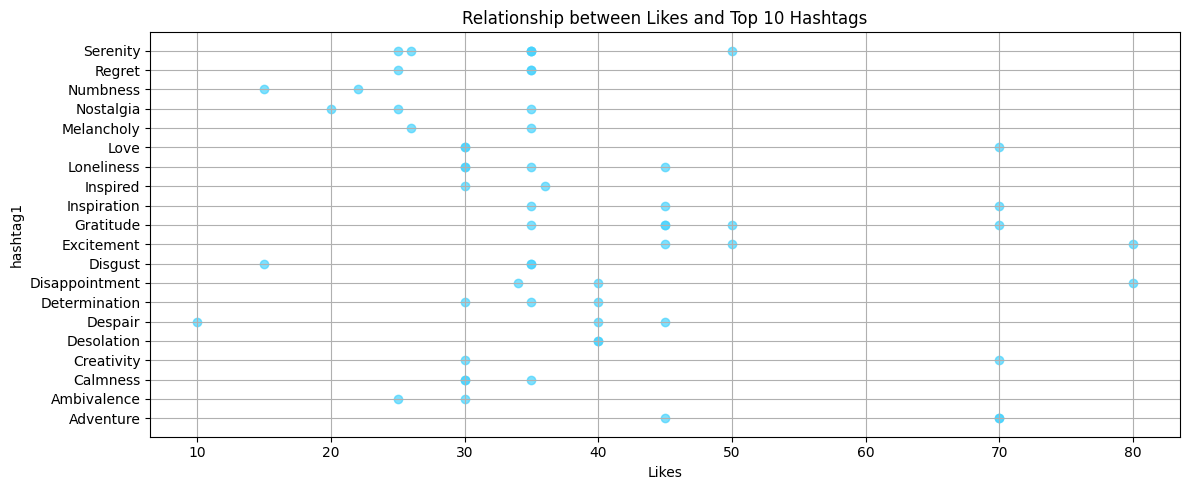

In [153]:

hashtag_counts = twitter_df['hashtag1'].value_counts().head(20) + twitter_df['hashtag2'].value_counts().head(20)

plt.figure(figsize=(12, 5))
for hashtag, count in hashtag_counts.items():
    filtered_df = twitter_df[twitter_df['hashtag1'] == hashtag]
    plt.scatter(filtered_df['Likes'], [hashtag] * len(filtered_df),
                c=twitter_colors[0], alpha=0.7)

plt.xlabel('Likes')
plt.ylabel('hashtag1')
plt.title('Relationship between Likes and Top 10 Hashtags')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Facebook

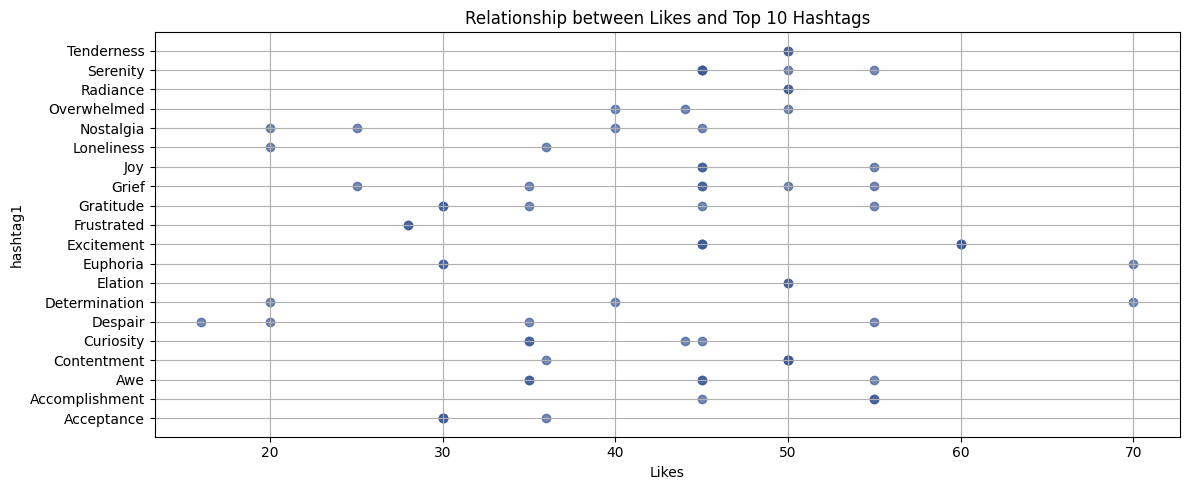

In [154]:
hashtag_counts = facebook_df['hashtag1'].value_counts().head(20) + facebook_df['hashtag2'].value_counts().head(20)

plt.figure(figsize=(12, 5))
for hashtag, count in hashtag_counts.items():
    filtered_df = facebook_df[facebook_df['hashtag1'] == hashtag]
    plt.scatter(filtered_df['Likes'], [hashtag] * len(filtered_df), 
                c=facebook_colors[2], alpha=0.7)

# Customize plot elements
plt.xlabel('Likes')
plt.ylabel('hashtag1')
plt.title('Relationship between Likes and Top 10 Hashtags')
plt.grid(True)
plt.tight_layout()
plt.show()

### Distribution of Sentiment Labels Across Different Users

#### Instagram

<Figure size 2000x600 with 0 Axes>

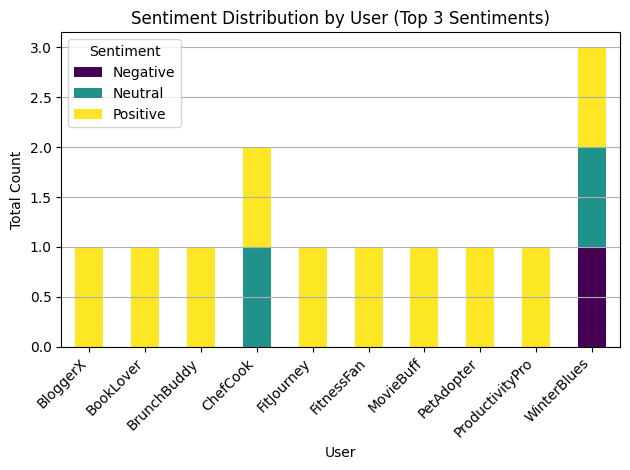

In [155]:
contingency_table = pd.crosstab(instagram_df['User'].head(10), instagram_df['Sentiment (Label)'].head(10))

top_sentiments = contingency_table.columns[:3]
contingency_table_subset = contingency_table[top_sentiments]

contingency_table_subset = contingency_table_subset.cumsum(axis=1)

user_ids = contingency_table_subset.index.to_numpy()

plt.figure(figsize=(20, 6))

contingency_table_subset.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('User')
plt.ylabel('Total Count')
plt.title('Sentiment Distribution by User (Top 3 Sentiments)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment', labels=top_sentiments.to_list())
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Twitter

<Figure size 2000x600 with 0 Axes>

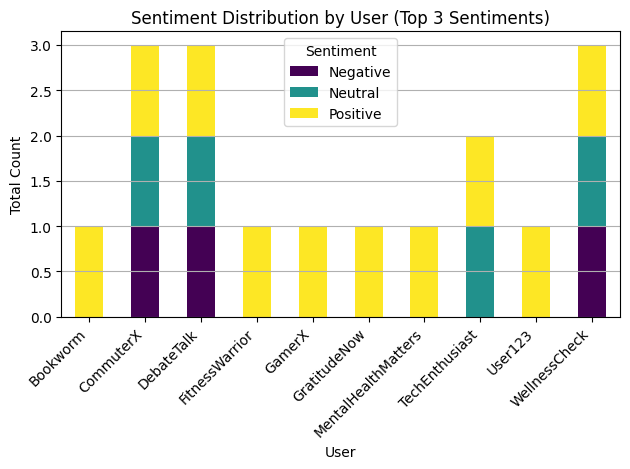

In [156]:
contingency_table = pd.crosstab(twitter_df['User'].head(10), twitter_df['Sentiment (Label)'].head(10))

top_sentiments = contingency_table.columns[:3]
contingency_table_subset = contingency_table[top_sentiments]

contingency_table_subset = contingency_table_subset.cumsum(axis=1)

user_ids = contingency_table_subset.index.to_numpy()

plt.figure(figsize=(20, 6))

contingency_table_subset.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('User')
plt.ylabel('Total Count')
plt.title('Sentiment Distribution by User (Top 3 Sentiments)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment', labels=top_sentiments.to_list())
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Facebook

<Figure size 2000x600 with 0 Axes>

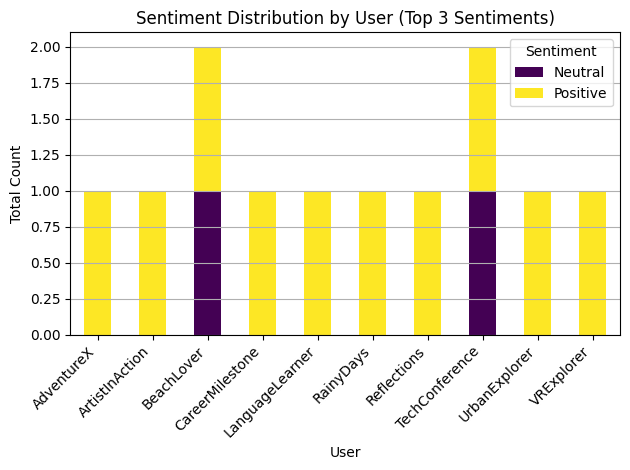

In [157]:
contingency_table = pd.crosstab(facebook_df['User'].head(10), facebook_df['Sentiment (Label)'].head(10))

top_sentiments = contingency_table.columns[:3]
contingency_table_subset = contingency_table[top_sentiments]

contingency_table_subset = contingency_table_subset.cumsum(axis=1)

user_ids = contingency_table_subset.index.to_numpy()

plt.figure(figsize=(20, 6))

contingency_table_subset.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('User')
plt.ylabel('Total Count')
plt.title('Sentiment Distribution by User (Top 3 Sentiments)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment', labels=top_sentiments.to_list())
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Words in Posts Captions

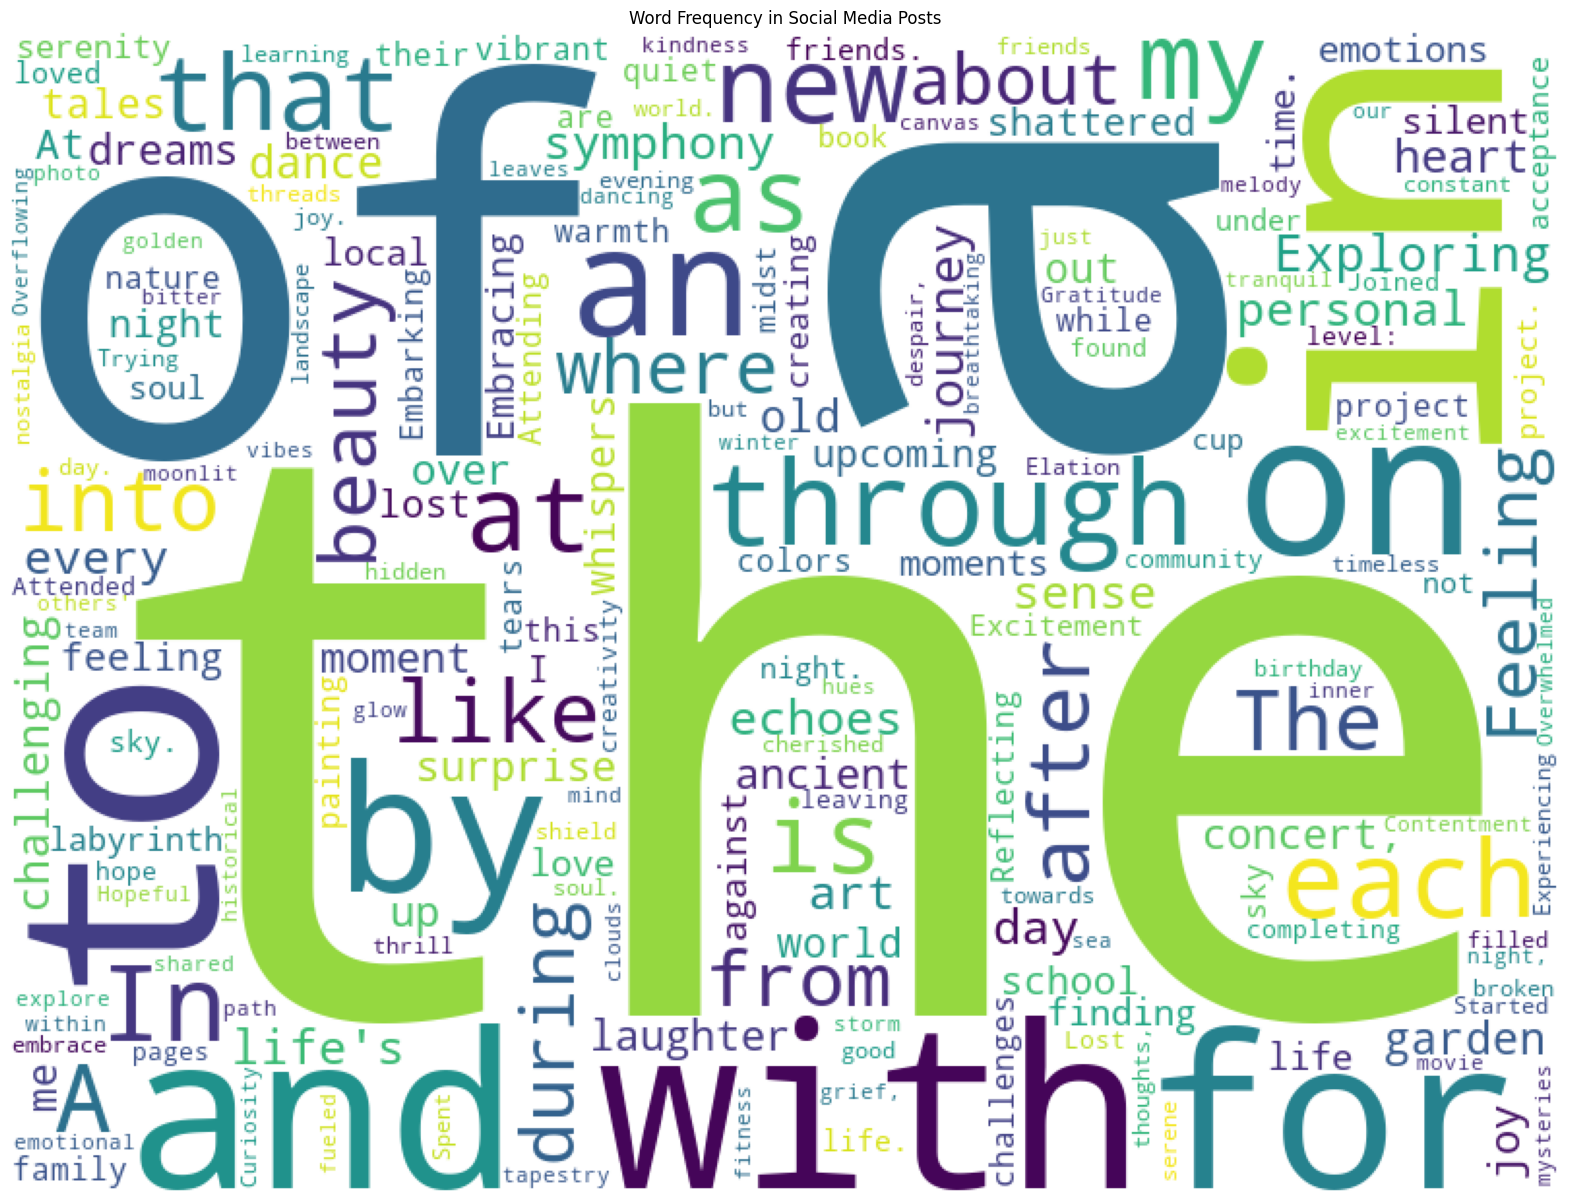

In [158]:
word_counts = Counter(word for text in df['Text'].to_list() for word in text.split())

wordcloud = WordCloud(background_color="white", width=800, height=600)

wordcloud.generate_from_frequencies(word_counts)


plt.figure(figsize=(20, 25))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Frequency in Social Media Posts")
plt.show()


The absence of slang terms in the analyzed social media captions suggests a formal or neutral tone in the content. This could be due to various factors, such as the target audience, brand identity, or platform guidelines.

#### Correlation Analysis 

In [159]:
from scipy.stats import chi2_contingency

def cramerV(x,y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

categorical_variables = ['Text', 'Sentiment (Label)', 'User', 'Source', 'Topic', 'Country', 'hashtag1', 'hashtag2']
categorical_df = df[categorical_variables]

cramers_matrix = np.zeros((categorical_df.shape[1], categorical_df.shape[1]))
for i in range(categorical_df.shape[1]):
    for j in range(categorical_df.shape[1]):
        cramers_matrix[i, j] = cramerV(categorical_df.iloc[:, i], categorical_df.iloc[:, j])

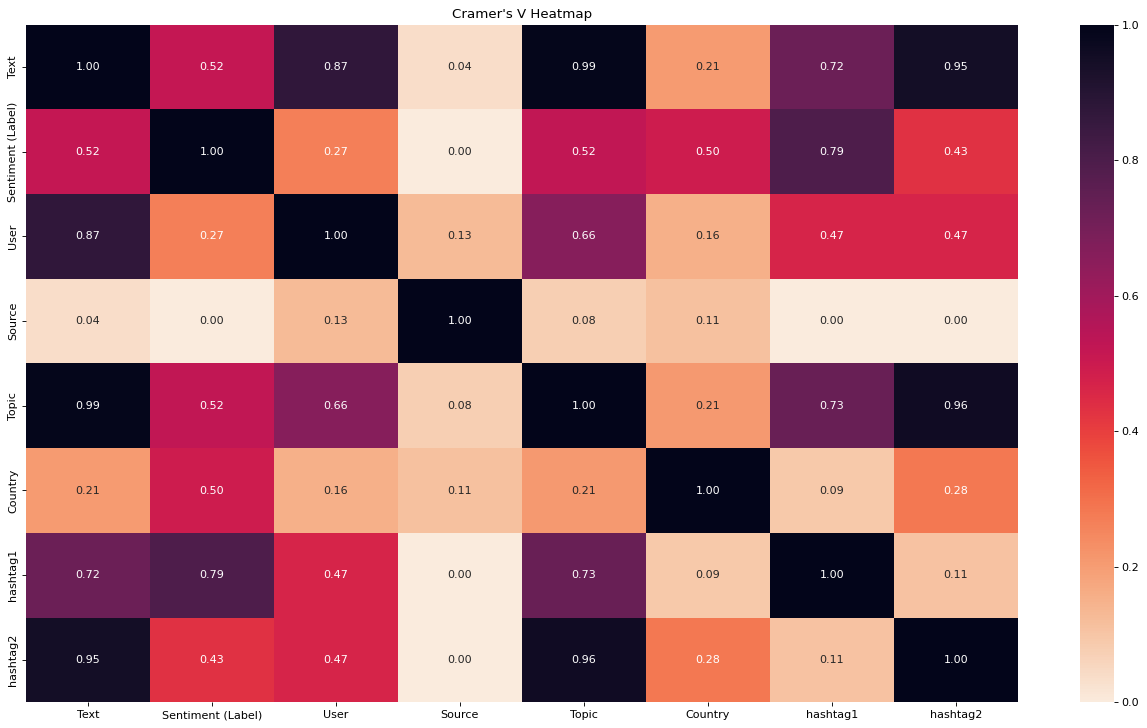

In [161]:
cl = categorical_df.columns.tolist()
plt.figure(figsize=(20,11), dpi=80)
sns.heatmap(cramers_matrix, annot=True, fmt=".2f", cmap="rocket_r",
            xticklabels=cl, yticklabels=cl)  
plt.title("Cramer's V Heatmap")
plt.show()

## Step 4: Premodelling Phase

In [162]:
# Importing Libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abdllrhman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abdllrhman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Abdllrhman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Cleaning the Text Column.

In [163]:
def clean_text(sentence):
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    sentence = re.sub(r"(https?://|www\.)\S+",' ',sentence)
    sentence = re.sub('\b[a-zA-Z]\b', ' ', sentence)
    sentence = sentence.strip()
    sentence = sentence.lower()
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(sentence)
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.lower() not in all_stopwords]
    sentence = ' '.join(tokens)

    return sentence

In [164]:
df['Text'] = df['Text'].apply(clean_text)
df['Text'].head(6)

0           enjoying beautiful day park
1              traffic terrible morning
2              finished amazing workout
3      excited upcoming weekend getaway
4      trying new recipe dinner tonight
5    feeling grateful little thing life
Name: Text, dtype: object

#### Dropping Unnessesary Columns.

In [165]:
df.drop(['User', 'Source', 'Topic', 'Retweets',
       'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour', 'hashtag1',
       'hashtag2'],axis = 1, inplace = True)

#### Making a new sentiment column using vader score.

In [166]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

SIA = SentimentIntensityAnalyzer()
df['Vader Score'] = df['Sentiment (Label)'].apply(lambda text: SIA.polarity_scores(text)['compound'])
df['Sentiment'] = df['Vader Score'].apply(lambda score: 'positive' if score >= 0.05
                                           else ('negative' if score <= -0.05
                                            else 'neutral'))
df.head(10)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Abdllrhman\AppData\Roaming\nltk_data...


Text Sentiment (Label)  Vader Score  \
0            enjoying beautiful day park          Positive       0.5574   
1               traffic terrible morning          Negative      -0.5719   
2               finished amazing workout          Positive       0.5574   
3       excited upcoming weekend getaway          Positive       0.5574   
4       trying new recipe dinner tonight           Neutral       0.0000   
5     feeling grateful little thing life          Positive       0.5574   
6  rainy day call cozy blanket hot cocoa          Positive       0.5574   
7           new movie release must watch          Positive       0.5574   
8  political discussion heating timeline          Negative      -0.5719   
9          missing summer vibe beach day           Neutral       0.0000   

  Sentiment  
0  positive  
1  negative  
2  positive  
3  positive  
4   neutral  
5  positive  
6  positive  
7  positive  
8  negative  
9   neutral

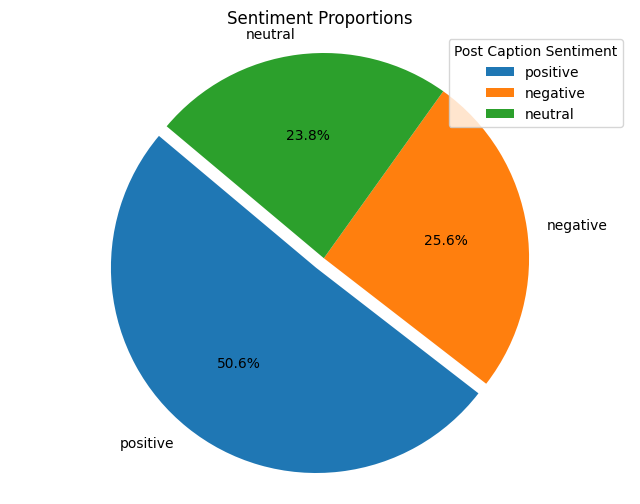

In [167]:
sentiment_count = df['Sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sentiment_count, labels=sentiment_count.index, autopct="%1.1f%%", explode=[0.06, 0, 0], startangle=140)

plt.title('Sentiment Proportions')
plt.legend(title='Post Caption Sentiment')

plt.axis('equal')
plt.show()

In [168]:
df.drop(['Sentiment (Label)', 'Vader Score'],axis = 1, inplace = True)

##### Encoding `Sentiment` Column

In [169]:
df['Sentiment'] = df['Sentiment'].map({
    "positive": 0,
    "neutral": 1,
    "negative": 2
})

#### Vectorizing our `Text` Column

##### Bag of Words Method

In [170]:
bow_vectorizer = CountVectorizer()
bow_vectorizer.fit(df['Text'])
bow_matrix = bow_vectorizer.transform(df['Text'])

##### TF-IDF Method

In [171]:
tf_idf_vectorizer = TfidfVectorizer()
tf_idf_matrix = tf_idf_vectorizer.fit_transform(df['Text'])

#### Splitting Data Into Train and Test

##### For BoW

In [172]:
x1 = bow_matrix
y1 = df['Sentiment']

In [173]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=0)

##### For TF-IDF

In [174]:
x2 = tf_idf_matrix
y2 = df['Sentiment']

In [175]:
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=0)

-------

## Step 5: Modelling

#### This is a classification problem so we are going to use these models:
- Logistic Regression
- K-Nearest Neighbors
- Naive Bayes (Gaussian and Multinomial)
- Support Vector Machine (SVM)
- Decision Tree
- Random Forest
- XGBoost
#### We will use these metrics to evaluate our model:
- Accuracy Score
- Precision
- Recall
- F1-Score

### Imports

In [178]:
# Importing the Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [179]:
# Importing Splitting Library and Model Evaluation Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

### Functions

In [180]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = [model_name])

    result = (result * 100).round(2).astype(str) + '%'
    return result

In [181]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports,
    confusion matrix.
    '''
    sns.set(font_scale=1.2)

    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))

    # Create figure and subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap='Blues', ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')
    ax1.grid(False)

    # Report results for the class specified by positive label
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax2.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(2, 2)
    table.set_fontsize(12)
    ax2.axis('tight')
    ax2.axis('off')
    # Modify color
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('white')
    plt.tight_layout()
    plt.show()

### `Logistic Regression`

##### Create Logistic Regression model with BoW training data.

c:\Users\Abdllrhman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       293
           1       1.00      1.00      1.00       129
           2       1.00      1.00      1.00       146

    accuracy                           1.00       568
   macro avg       1.00      1.00      1.00       568
weighted avg       1.00      1.00      1.00       568


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.88      0.76        67
           1       0.57      0.40      0.47        40
           2       0.85      0.61      0.71        36

    accuracy                           0.68       143
   macro avg       0.69      0.63      0.65       143
weighted avg       0.68      0.68      0.66       143



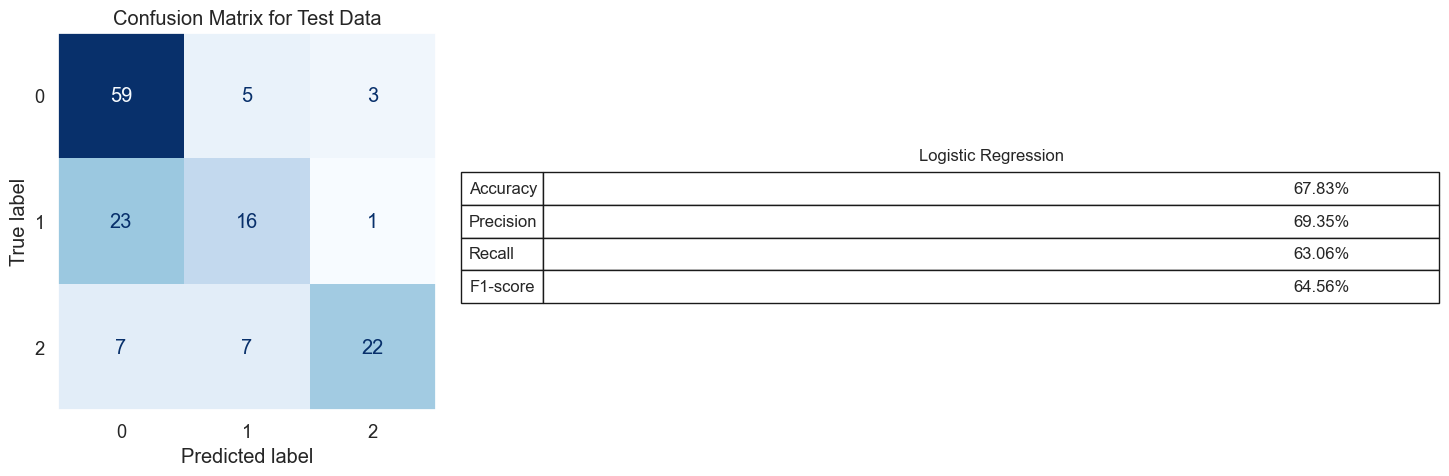

In [182]:
lr_bow_model = LogisticRegression(multi_class='multinomial',solver='saga',penalty='l2')
lr_bow_model.fit(X1_train, y1_train)
model_evaluation(lr_bow_model , X1_train , X1_test, y1_train, y1_test, "Logistic Regression")

##### Using TF-IDF


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       293
           1       1.00      0.80      0.89       129
           2       0.99      0.97      0.98       146

    accuracy                           0.95       568
   macro avg       0.97      0.92      0.94       568
weighted avg       0.95      0.95      0.94       568


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.56      0.99      0.71        67
           1       0.70      0.17      0.28        40
           2       0.93      0.39      0.55        36

    accuracy                           0.61       143
   macro avg       0.73      0.52      0.51       143
weighted avg       0.69      0.61      0.55       143



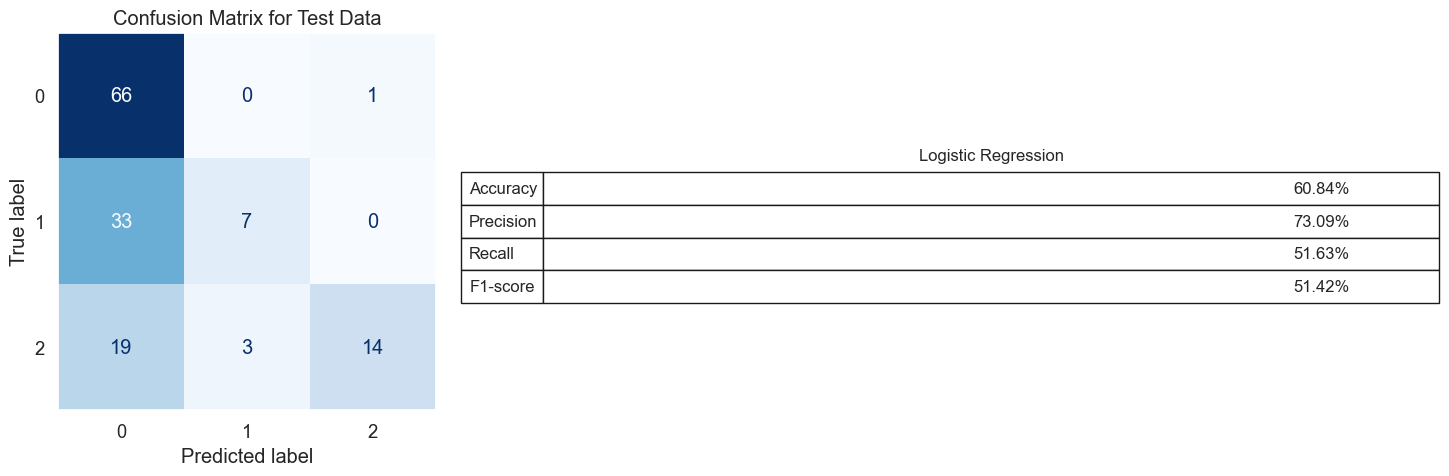

In [183]:
lr_tfidf_model = LogisticRegression(multi_class='multinomial',solver='saga',penalty='l2')
lr_tfidf_model.fit(X2_train, y2_train)
model_evaluation(lr_tfidf_model , X2_train , X2_test, y2_train, y2_test, "Logistic Regression")

### `Random Forest`


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       293
           1       1.00      1.00      1.00       129
           2       1.00      1.00      1.00       146

    accuracy                           1.00       568
   macro avg       1.00      1.00      1.00       568
weighted avg       1.00      1.00      1.00       568


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.97      0.74        67
           1       0.69      0.28      0.39        40
           2       0.84      0.44      0.58        36

    accuracy                           0.64       143
   macro avg       0.71      0.56      0.57       143
weighted avg       0.69      0.64      0.60       143



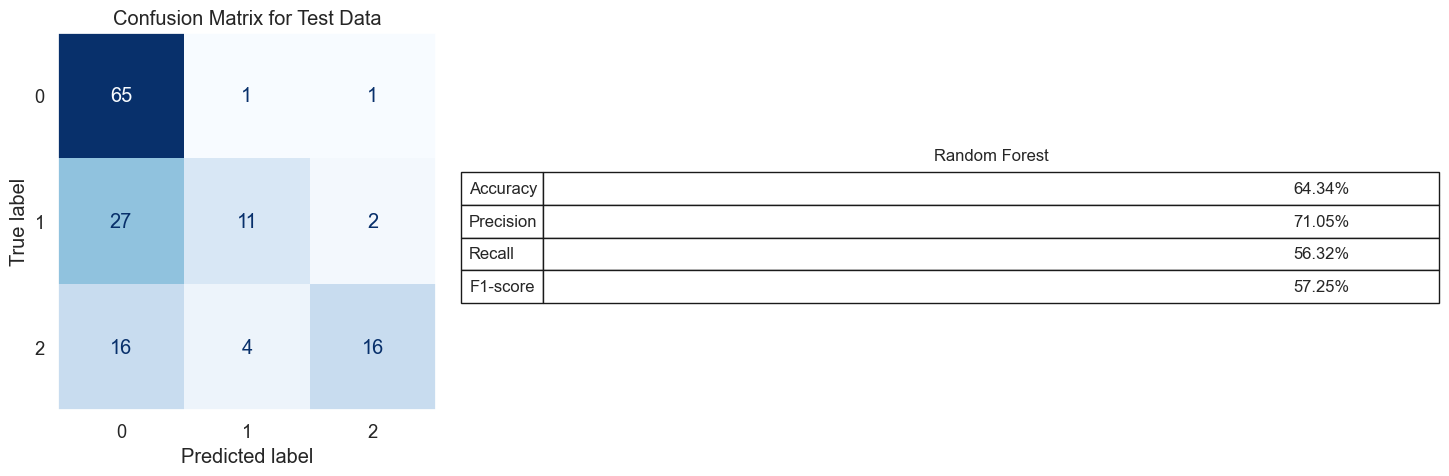

In [299]:
rf_bow_model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
rf_bow_model.fit(X1_train, y1_train)
model_evaluation(rf_bow_model, X1_train, X1_test, y1_train, y1_test, "Random Forest")


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       293
           1       1.00      1.00      1.00       129
           2       1.00      1.00      1.00       146

    accuracy                           1.00       568
   macro avg       1.00      1.00      1.00       568
weighted avg       1.00      1.00      1.00       568


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.57      0.97      0.72        67
           1       0.64      0.23      0.33        40
           2       0.93      0.39      0.55        36

    accuracy                           0.62       143
   macro avg       0.72      0.53      0.53       143
weighted avg       0.68      0.62      0.57       143



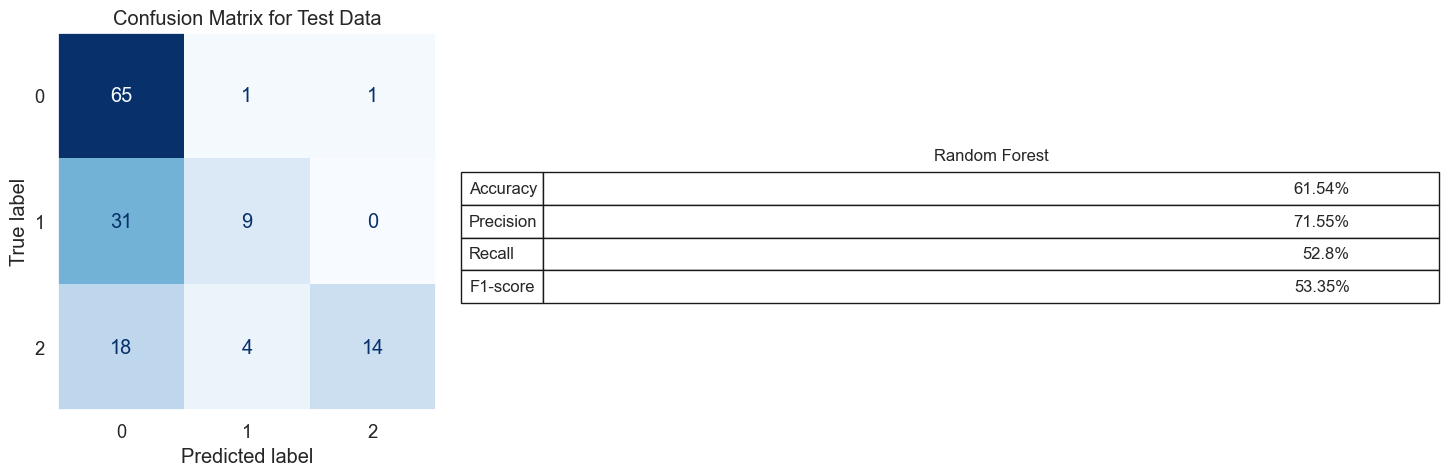

In [297]:
rf_tfidf_model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
rf_tfidf_model.fit(X2_train, y2_train)
model_evaluation(rf_tfidf_model, X2_train, X2_test, y2_train, y2_test, "Random Forest")

-----

## Conclusion